<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA</center>
<center>LISTA 07a</center>
<center>ALUNO:  Daniel Barbosa Vasconcelos</center>
</div>

In [1]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
plt.style.use("classic")

In [2]:
# Pegando os dados em zip
dados_prf_2018 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/MaC6cieXSFACNWT/download',
                        encoding = 'latin1', compression = 'zip', sep = ';')
dados_prf_2019 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download',
                        encoding = 'latin1', compression = 'zip', sep = ';')
dados_prf_2020 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/rVfIQjF0wrwHa5P/download',
                        encoding = 'latin1', compression = 'zip', sep = ';')
dados_prf_2021 = pd.read_csv('http://arquivos.prf.gov.br/arquivos/index.php/s/n1T3lymvIdDOzzb/download',
                        encoding = 'latin1', compression = 'zip', sep = ';')

# juntando todo os dataframes com concat
juntando_dados = pd.concat([dados_prf_2018,dados_prf_2019 ,dados_prf_2020,dados_prf_2021],
                          keys = ['2018', '2019', '2020', '2021'])
juntando_dados

id data_inversa     dia_semana   horario  uf     br     km  \
2018 0       99973.0   2018-01-01  segunda-feira  00:20:00  RJ  116.0  303,5   
     1       99976.0   2018-01-01  segunda-feira  00:40:00  SC  282.0    0,4   
     2       99977.0   2018-01-01  segunda-feira  00:30:00  RJ  493.0      1   
     3       99981.0   2018-01-01  segunda-feira  01:15:00  RS  386.0    134   
     4       99982.0   2018-01-01  segunda-feira  00:20:00  RS  293.0  151,7   
...              ...          ...            ...       ...  ..    ...    ...   
2021 64510  425426.0   2021-05-13   quinta-feira  03:15:00  MG  381.0  775,3   
     64511  425436.0   2021-11-15  segunda-feira  23:00:00  PA   10.0  248,4   
     64512  428107.0   2021-09-21    terça-feira  01:10:00  MG   50.0     20   
     64513  435016.0   2021-12-29   quarta-feira  13:40:00  AC  364.0    170   
     64514  441173.0   2021-08-22        domingo  17:10:00  MT  364.0    498   

                 municipio                                     causa_acidente  \
2018 0             RESENDE                                  Condutor Dormindo   
     1       FLORIANOPOLIS                 Não guardar distância de segurança   
     2            ITABORAI                             Ultrapassagem Indevida   
     3             SARANDI                                 Ingestão de Álcool   
     4            CANDIOTA                        Falta de Atenção à Condução   
...                    ...                                                ...   
2021 64510        CAMPANHA  Condutor deixou de manter distância do veículo...   
     64511  AURORA DO PARA                             Transitar na contramão   
     64512        ARAGUARI                                  Condutor Dormindo   
     64513          BUJARI                                   Pista esburacada   
     64514         JANGADA           Reação tardia ou ineficiente do condutor   

                           tipo_acidente  ... feridos_graves ilesos ignorados  \
2018 0         Saída de leito carroçável  ...              4      1         0   
     1                  Colisão traseira  ...              2      1         0   
     2                   Colisão frontal  ...              0      3         1   
     3               Colisão transversal  ...              0      2         0   
     4         Saída de leito carroçável  ...              1      0         0   
...                                  ...  ...            ...    ...       ...   
2021 64510              Colisão traseira  ...              0      2         0   
     64511           Colisão transversal  ...              1      1         0   
     64512            Colisão com objeto  ...              2      1         0   
     64513  Queda de ocupante de veículo  ...              1      0         0   
     64514              Colisão traseira  ...              0      1         0   

           feridos veiculos      latitude     longitude  regional  delegacia  \
2018 0           4        1     -22,46937     -44,44705     SR-RJ     DEL5/7   
     1           2        2  -27,59971687  -48,57565694     SR-SC     DEL8/1   
     2           1        3    -22,763901    -42,927532     SR-RJ     DEL5/4   
     3           0        2    -27,953636    -52,916374     SR-RS    DEL9/14   
     4           1        1    -31,395214  -53,78391174     SR-RS    DEL9/11   
...            ...      ...           ...           ...       ...        ...   
2021 64510       2        2    -21.790183    -45.446659     SR-MG      UOP02   
     64511       2        2     -2.267754    -47.563084     SR-PA      UOP01   
     64512       7        1     -18.58721    -48.056456     SR-MG      UOP02   
     64513       1        1     -9.766854    -68.056811     SR-AC      UOP01   
     64514       1        2    -15.263832    -56.455487     SR-MT      UOP02   

                 uop  
2018 0      UOP03/RJ  
     1      UOP01/SC  
     2      UOP02/RJ  
     3      UOP01/RS  
     4      UOP03/RS  
...         

In [3]:
dados_prf_2021.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

<div class="alert alert-block alert-info">
    1° Tarefa<br>Classifique todas as variáveis disponíveis no conjunto de dados, justificando sua classificação.
<div>

**id** = Quantitativa discreta(Por conter numeros especificos dos acidentes)<br>
**data_inversa** = Quantitativa continua(Por conter numeros de datas e datas tem continuidade)<br>
**dia_semana** = Qualitativa ordinal(Por conter dia da semana em forma de texto de forma ordenada)<br>
**horario** = Quantitativa continua(Por conter conter numeros que tem contunuidade como **horas)**<br>
**uf** = Qualitativa nominal(Por conter sigla de estados) <br>
**br** = Qualitativa ordinal(Por conter Variável com valores numéricos,representando o identificador da BR do acidente)<br>
**km** = Quantitativa discreta(Por conter numeros)<br>
**municipio** = Qualitativa nominal(Por conter sigla da dos municipios)<br>
**causa_acidente** = Qualitativa nominal(Por conter qual foi a causa do acidente)<br>
**tipo_acidente** = Qualitativa nominal(Por conter os tipos de acidentes sem ordem)<br>
**classificacao_acidente** = Qualitativa ordinal(Por conter clasificação de acidente)<br>
**fase_dia** = Qualitativa ordinal(Por conter a qual fase do dia esta dia noite tarde que tem ordem)<br>
**sentido_via** = Qualitativa nominal(Por conter so dois fatores crescente ou decrecente)<br>
**condicao_metereologica** = Qualitativa nominal(Por conter fotores sem ordem nome de condições meteorologicas)<br>
**tipo_pista** = Qualitativa ordinal(Por conter ordem os nomes)<br>
**tracado_via** = Qualitativa nominal(Por conter drescição do trçado)<br>
**uso_solo** = Qualitativa nominal(Por conter palavra duas sim ou não)<br>
**pessoas** = Quantitativa discreta(Por conter quantidade de pessoas)<br>
**mortos** = Quantitativa discreta(Por conter quantidade de mortos)<br>
**feridos_leves** = Quantitativa discreta(Por conter quantidade de feridos leves)<br>
**feridos_graves** = Quantitativa discreta(Por conter quantidade de feridos_graves)<br>
**ilesos** = Quantitativa discreta(Por conter quantidade de ilesos)<br>
**ignorados** = Quantitativa discreta(Por conter quantidade de ignorados)<br>
**feridos** = Quantitativa discreta(Por conter quantidade de feridos)<br>
**veiculos** = Quantitativa discreta(Por conter quantidade de mortos veiculos)<br>
**latitude** = Quantitativa continua(Por conter latitude)<br>
**longitude** = Quantitativa continua(Por conter longitude)<br>
**regional** = Qualitativa nominal(Por conter sigla reginonal)<br>
**delegacia** = Qualitativa nominal(Por conter a sigla da delagacia)<br>
**uop** = Qualitativa ordinal(Por conter a ordem de Unidades de Ordem Pública)<br>

<div class="alert alert-block alert-info">
    2° Tarefa<br>Construa distribuições de frequência e ao menos um gráfico que representa os dados de
cada variável do conjunto. sua classificação.
<div>

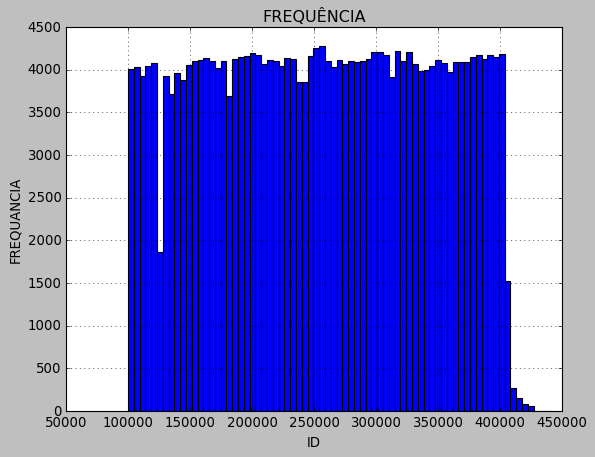

In [4]:
fi, classes, x = plt.hist(juntando_dados['id'],bins='auto')
plt.title('FREQUÊNCIA')
plt.xlabel('ID')
plt.ylabel('FREQUANCIA')
plt.grid()

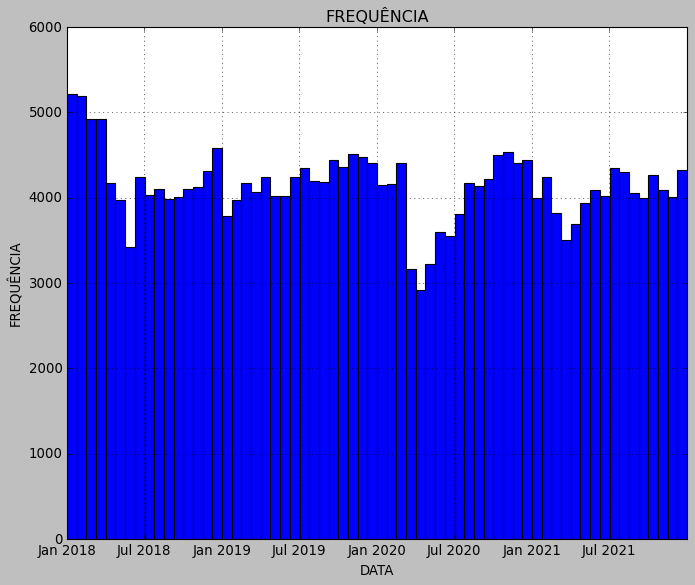

In [5]:
plt.figure( figsize=(10, 8))
juntando_dados['data_inversa'] = pd.to_datetime(juntando_dados['data_inversa'])
fi, classes, x = plt.hist(juntando_dados['data_inversa'],bins='auto')
plt.title('FREQUÊNCIA')
plt.xlabel('DATA')
plt.ylabel('FREQUÊNCIA')
plt.grid()

In [6]:
import datetime as dt
juntando_dados['horario']= pd.to_datetime(juntando_dados['horario']).dt.hour

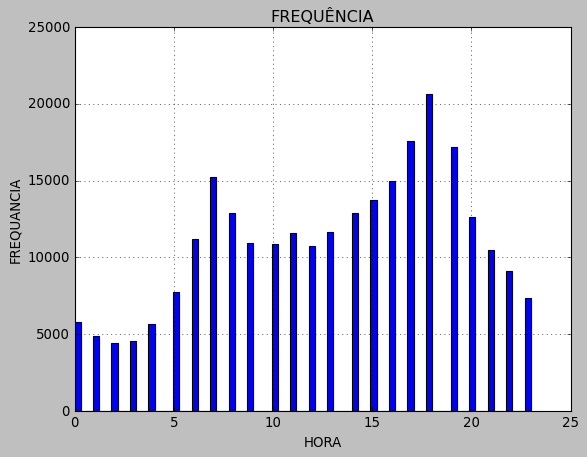

In [7]:
fi, classes, x = plt.hist(juntando_dados['horario'],bins='auto')
plt.title('FREQUÊNCIA')
plt.xlabel('HORA')
plt.ylabel('FREQUANCIA')
plt.grid()

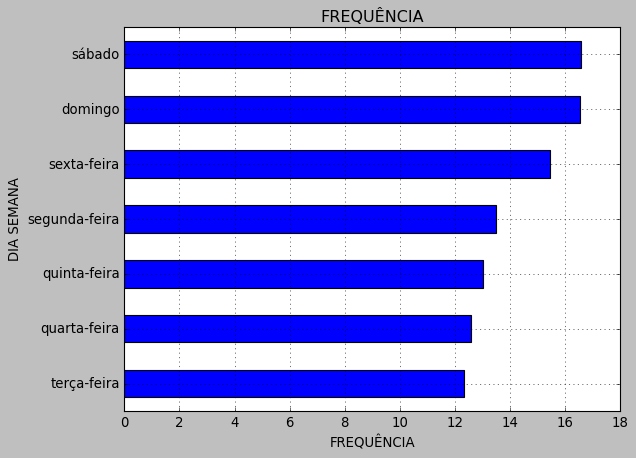

In [8]:
(juntando_dados['dia_semana'].value_counts(normalize=True, ascending = True)*100).plot.barh()
plt.title('FREQUÊNCIA')
plt.ylabel('DIA SEMANA')
plt.xlabel('FREQUÊNCIA')
plt.grid()

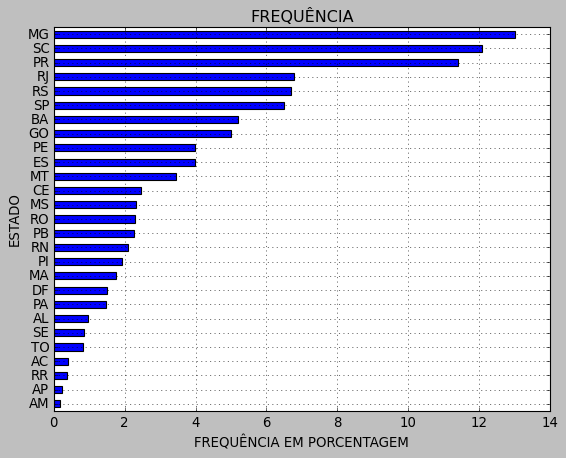

In [9]:

(juntando_dados['uf'].value_counts(normalize=True, ascending = True)*100).plot.barh()
plt.title('FREQUÊNCIA')
plt.ylabel('ESTADO')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

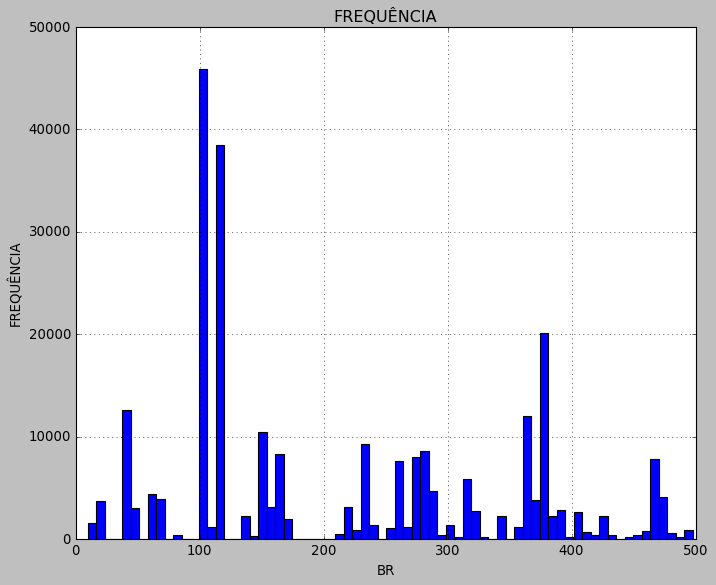

In [10]:
plt.figure( figsize=(10, 8))
fi, classes, x = plt.hist(juntando_dados['br'],bins='auto')
plt.title('FREQUÊNCIA')
plt.xlabel('BR')
plt.ylabel('FREQUÊNCIA')
plt.grid()

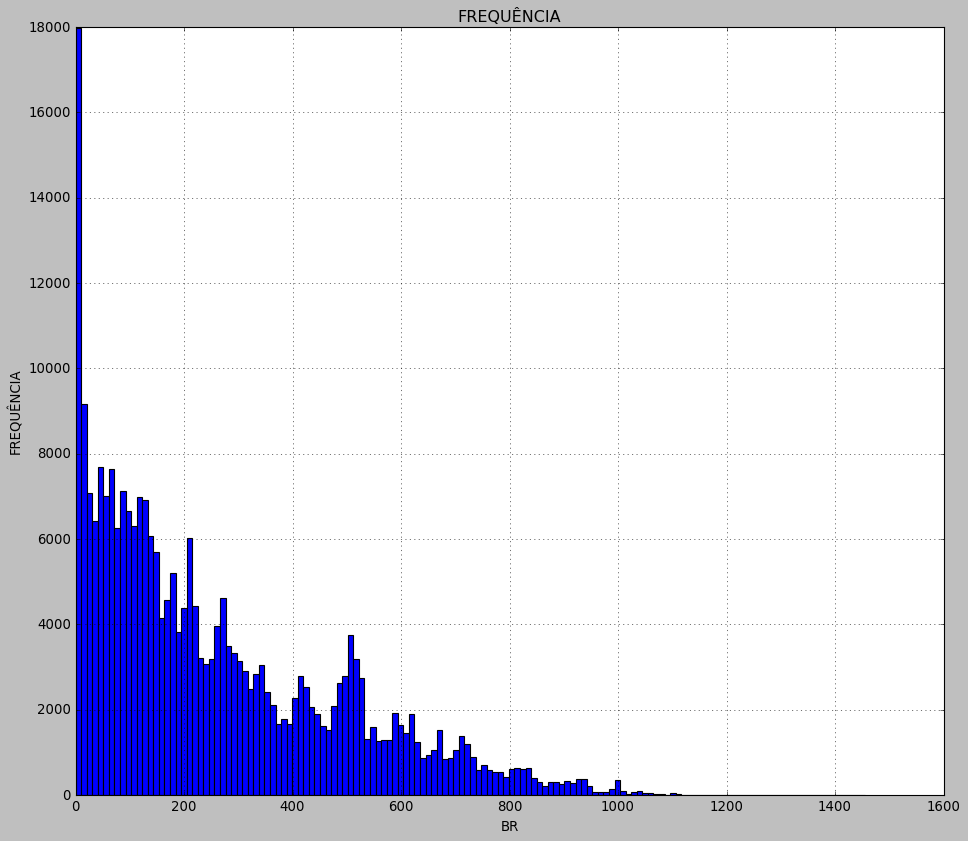

In [11]:
plt.figure( figsize=(14, 12))
juntando_dados['km'] = juntando_dados['km'].replace(',','.', regex=True).astype(float)
fi, classes, x = plt.hist(juntando_dados['km'],bins='auto')
plt.title('FREQUÊNCIA')
plt.xlabel('BR')
plt.ylabel('FREQUÊNCIA')
plt.grid()

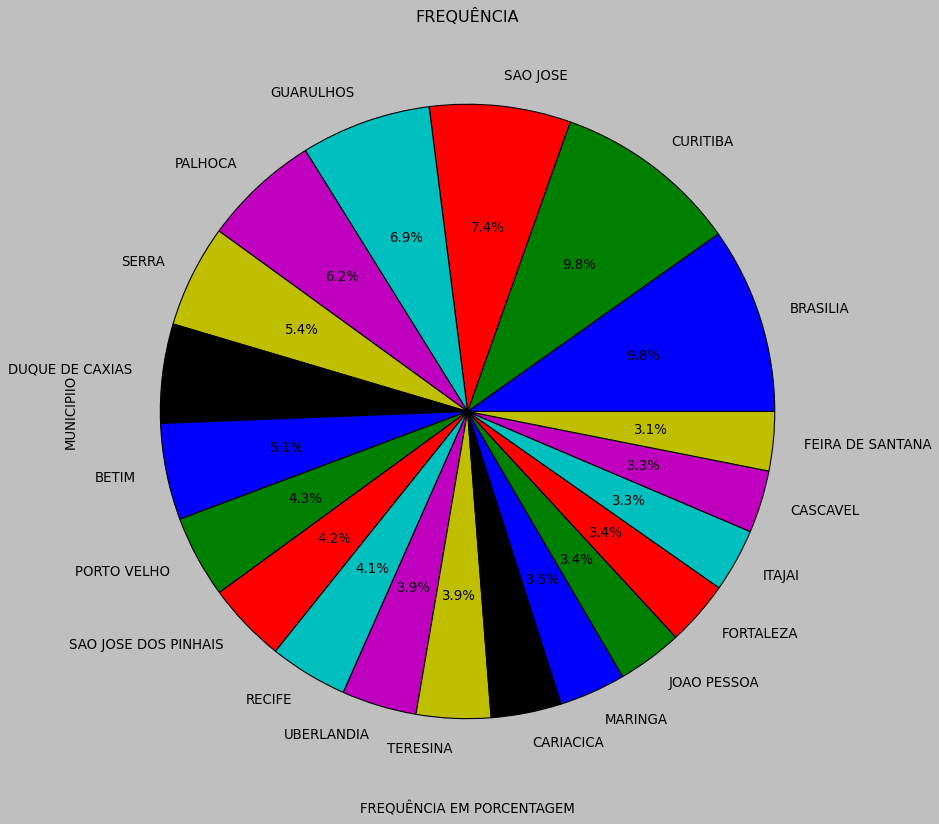

In [12]:
plt.figure( figsize=(14, 12))
(juntando_dados['municipio'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('MUNICIPIIO')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

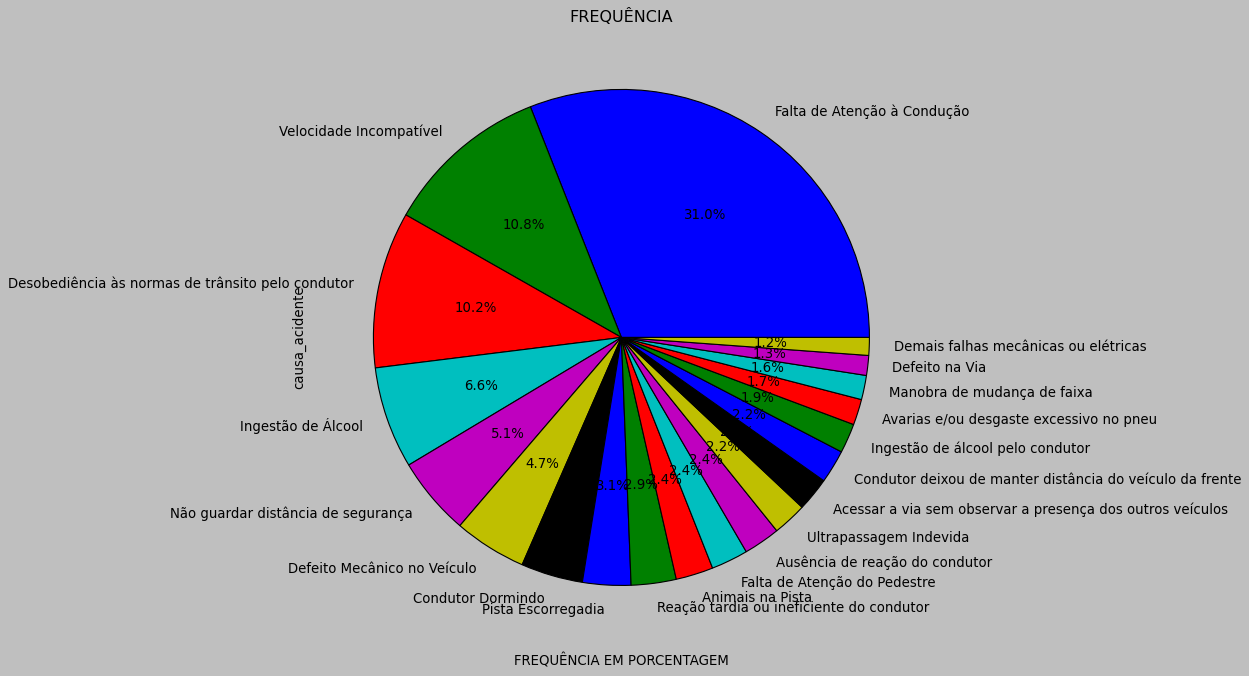

In [13]:
plt.figure( figsize=(10, 20))
(juntando_dados['causa_acidente'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('causa_acidente')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

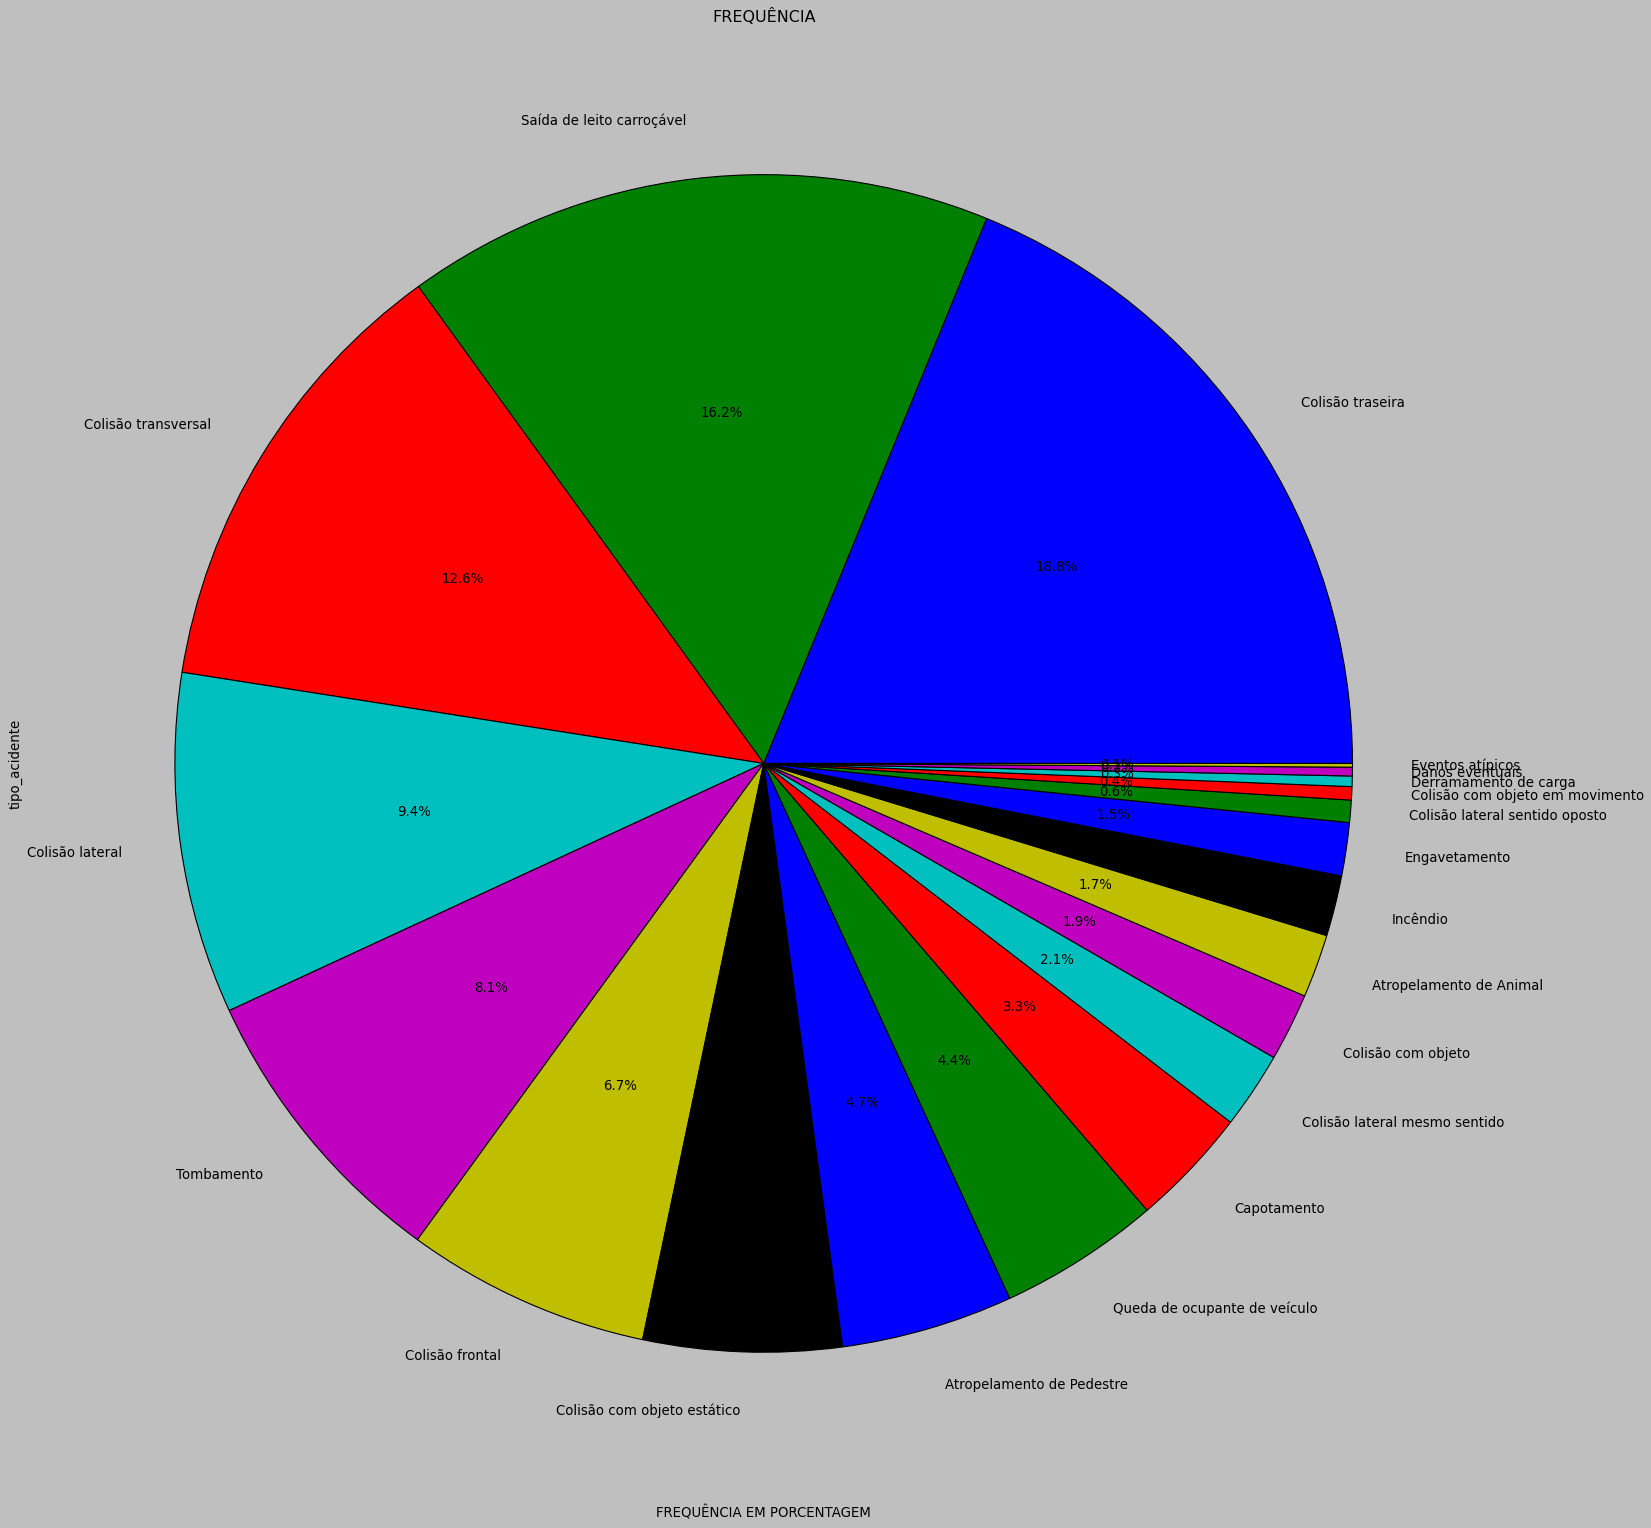

In [14]:
plt.figure( figsize=(25, 23))
(juntando_dados['tipo_acidente'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('tipo_acidente')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

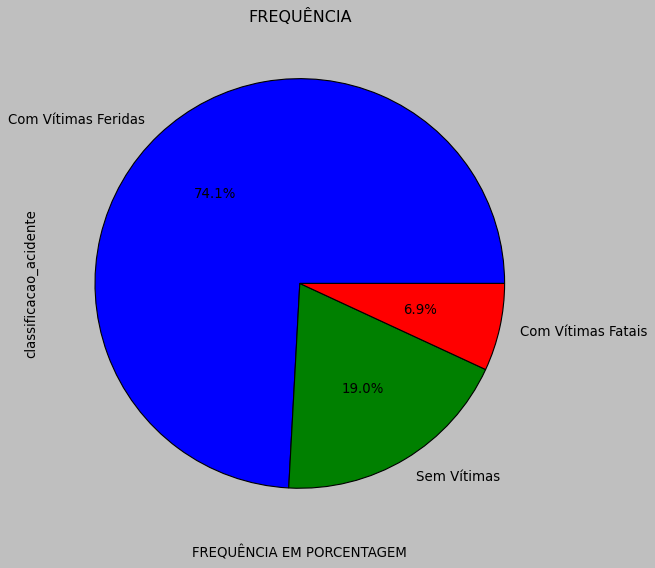

In [15]:
plt.figure( figsize=(10, 8))
(juntando_dados['classificacao_acidente'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('classificacao_acidente')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

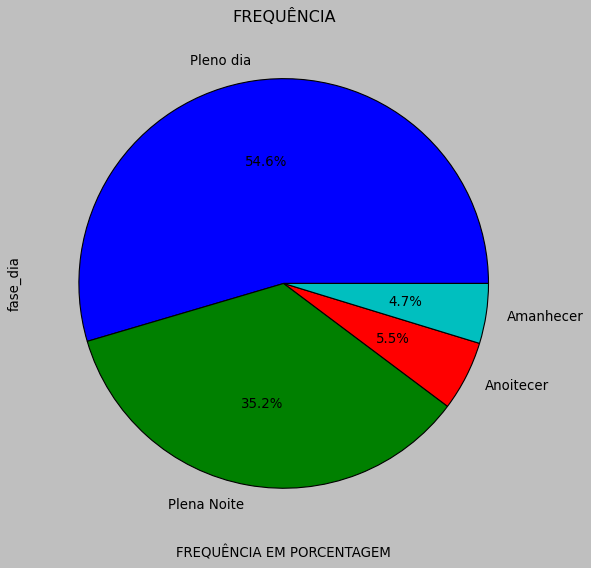

In [16]:
plt.figure( figsize=(10, 8))
(juntando_dados['fase_dia'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('fase_dia')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

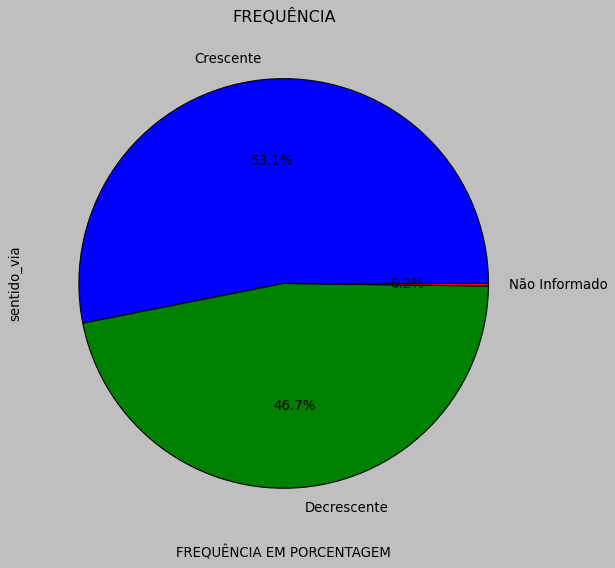

In [17]:
plt.figure( figsize=(10, 8))
(juntando_dados['sentido_via'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('sentido_via')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

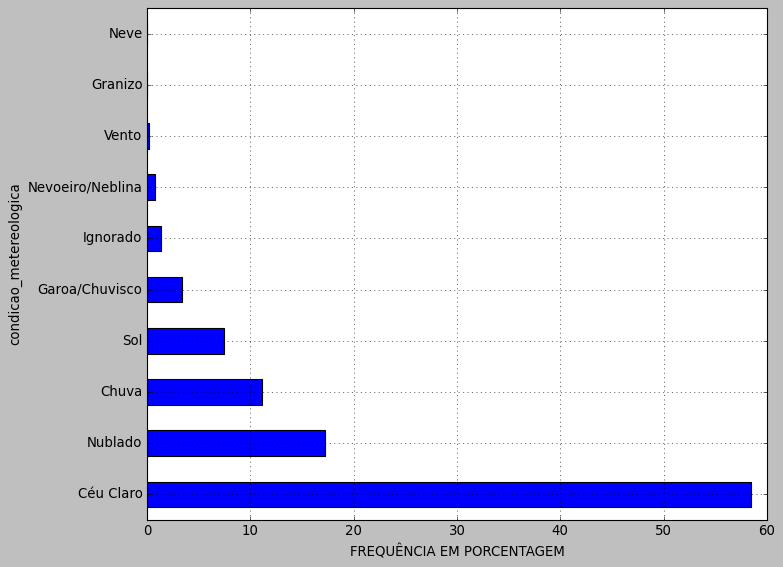

In [18]:
plt.figure( figsize=(10, 8))
(juntando_dados['condicao_metereologica'].value_counts(normalize=True)*100).head(20).plot.barh()
plt.ylabel('condicao_metereologica')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

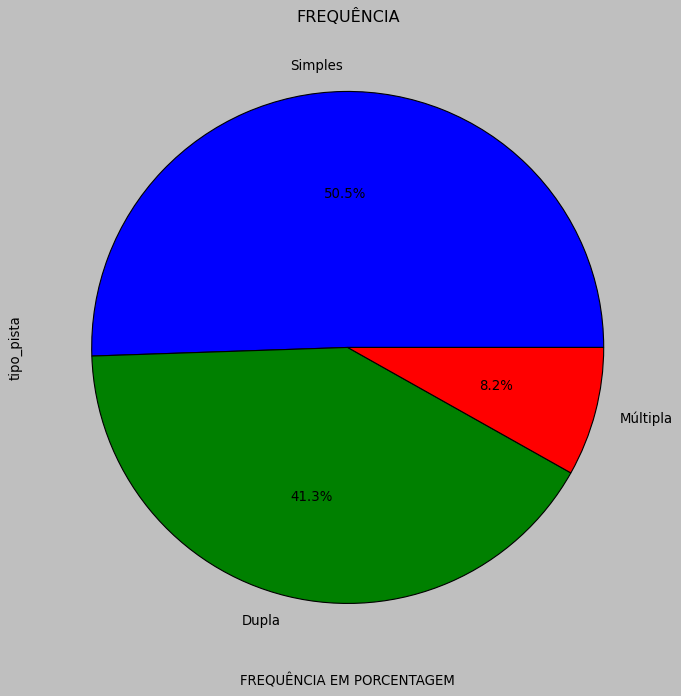

In [19]:
plt.figure( figsize=(12, 10))
(juntando_dados['tipo_pista'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('tipo_pista')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

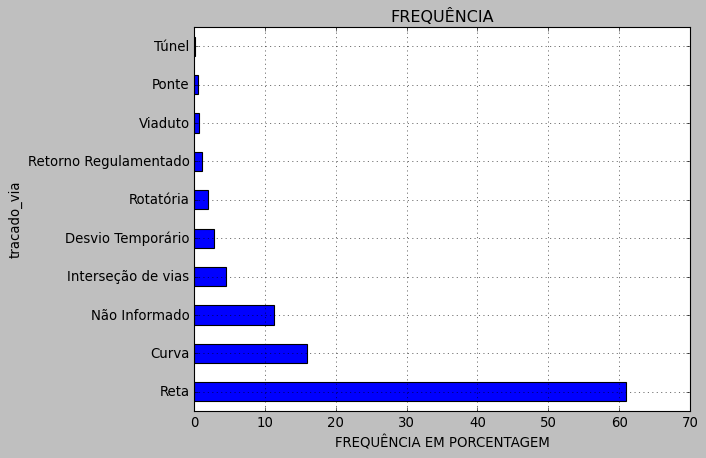

In [20]:

(juntando_dados['tracado_via'].value_counts(normalize=True)*100).head(20).plot.barh()
plt.title('FREQUÊNCIA')
plt.ylabel('tracado_via')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')
plt.grid()

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

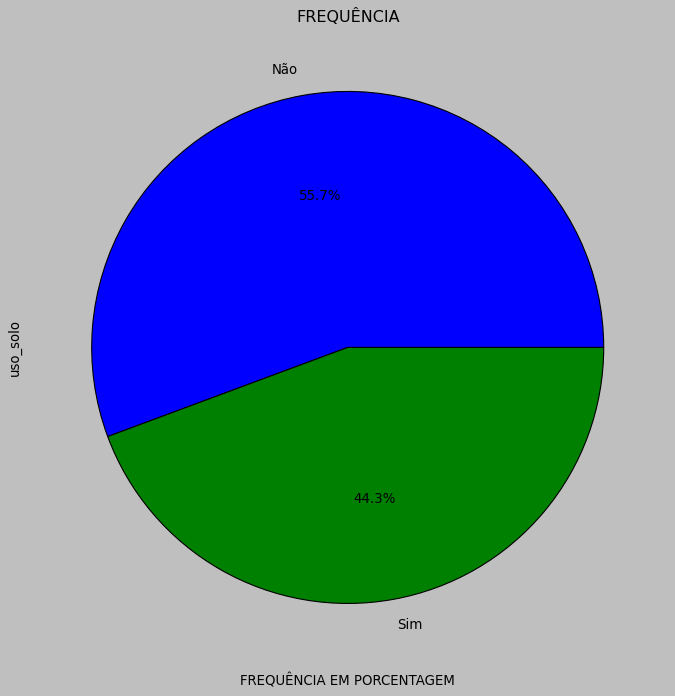

In [21]:
plt.figure( figsize=(12, 10))
(juntando_dados['uso_solo'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('uso_solo')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

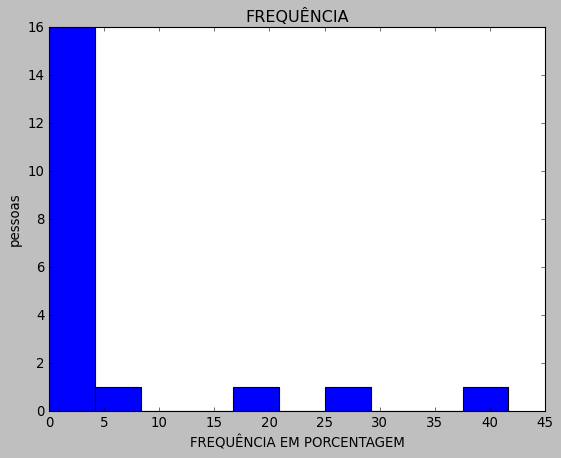

In [22]:
(juntando_dados['pessoas'].value_counts(normalize=True)*100).head(20).plot.hist()
plt.title('FREQUÊNCIA')
plt.ylabel('pessoas')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

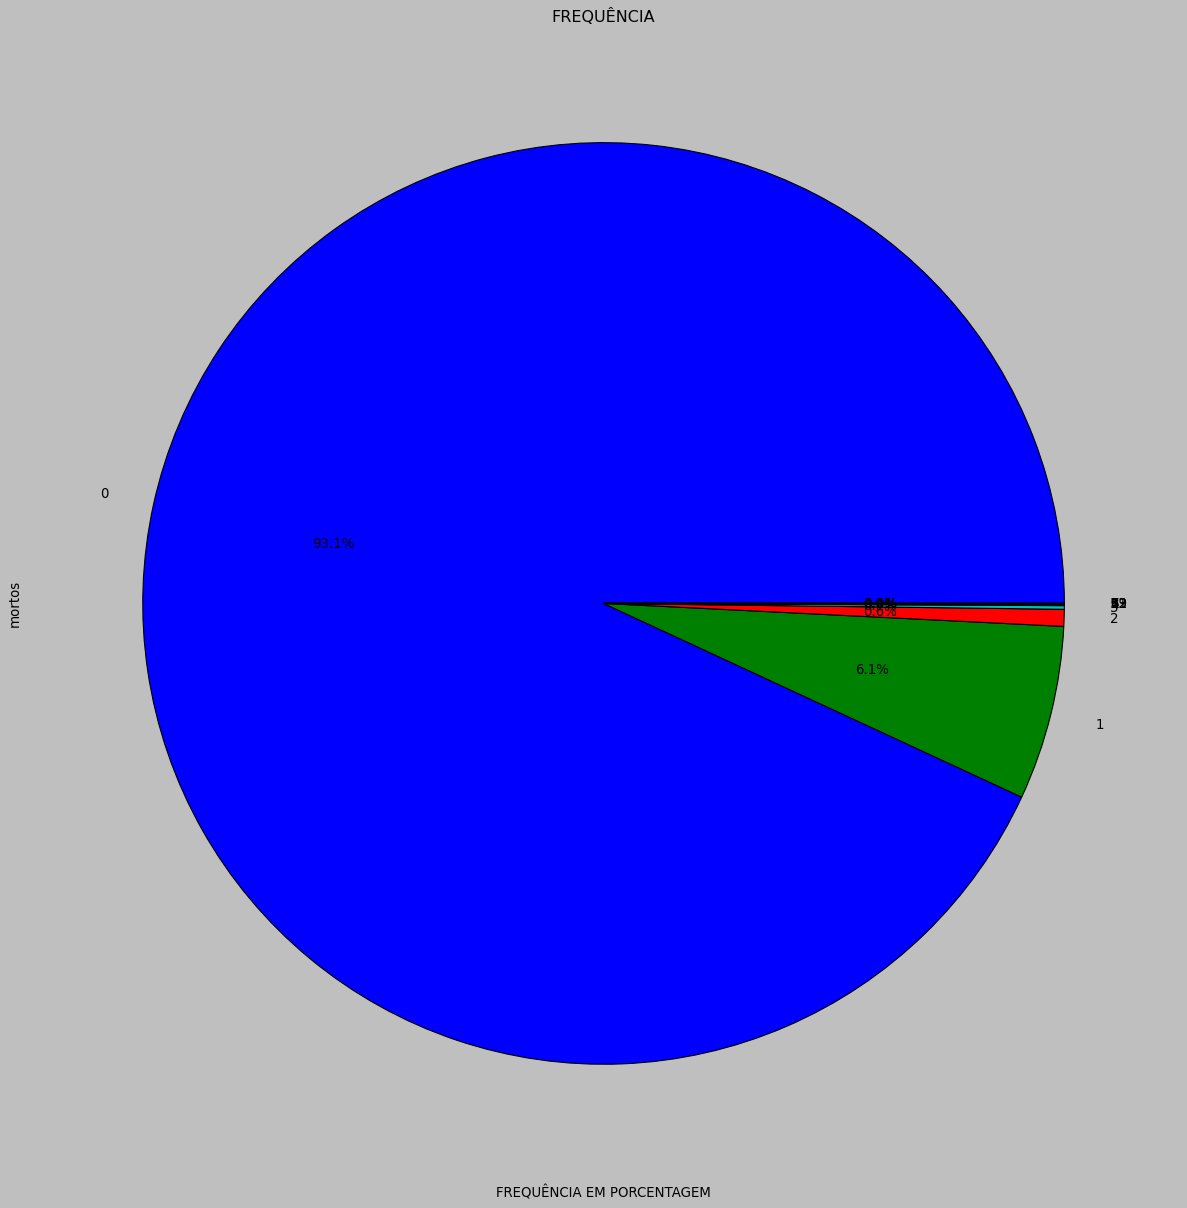

In [23]:
plt.figure( figsize=(20, 18))
(juntando_dados['mortos'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('mortos')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

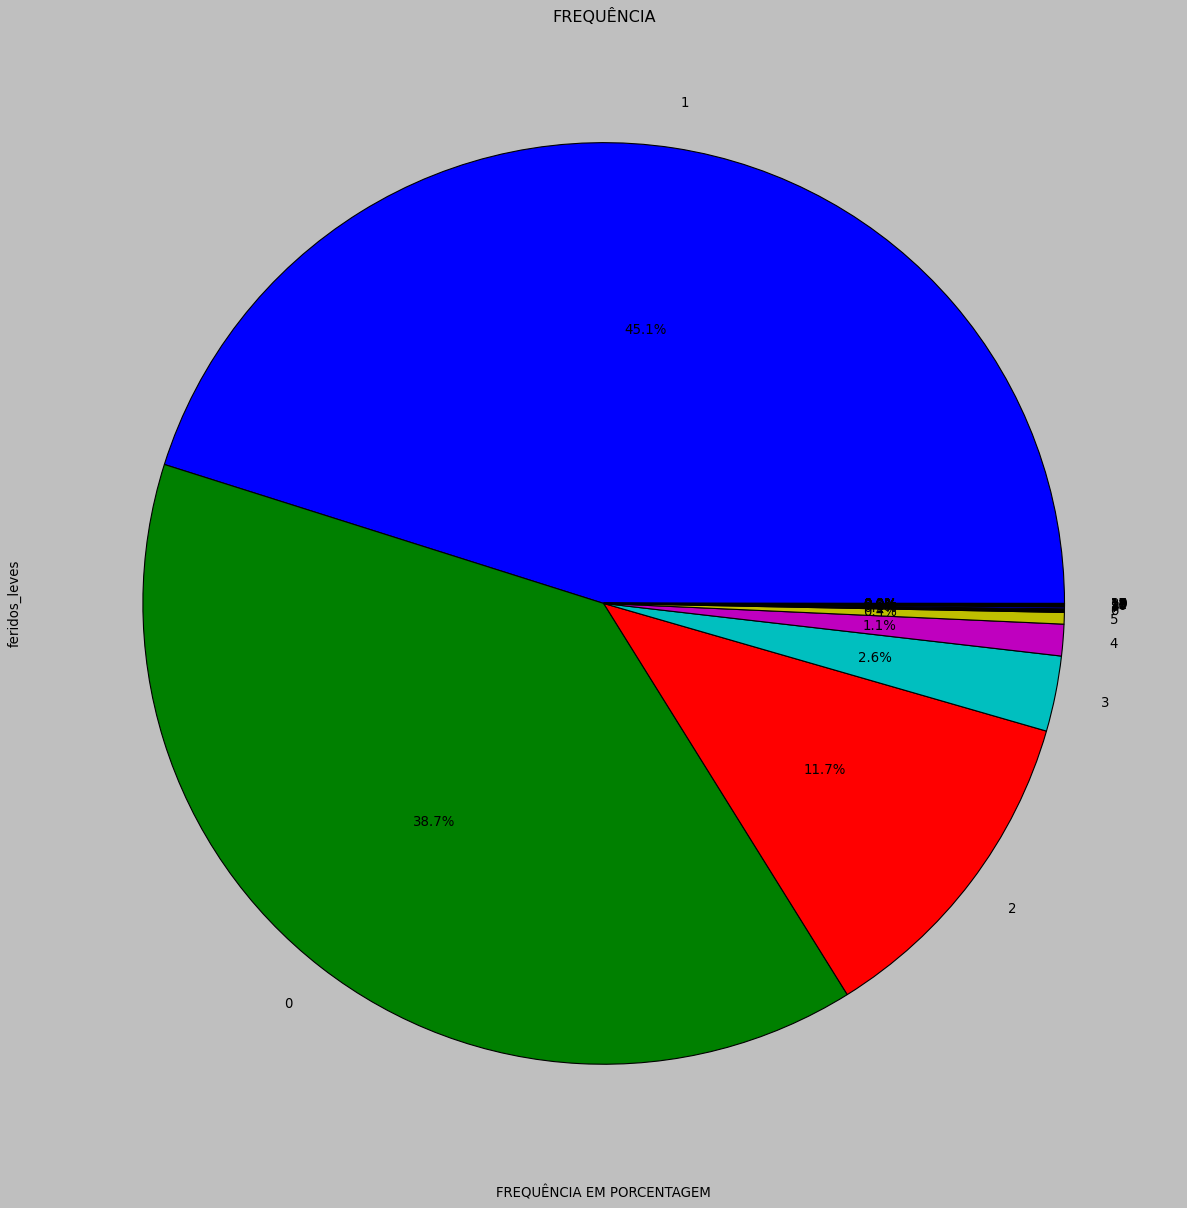

In [24]:
plt.figure( figsize=(20, 18))
(juntando_dados['feridos_leves'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('feridos_leves')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

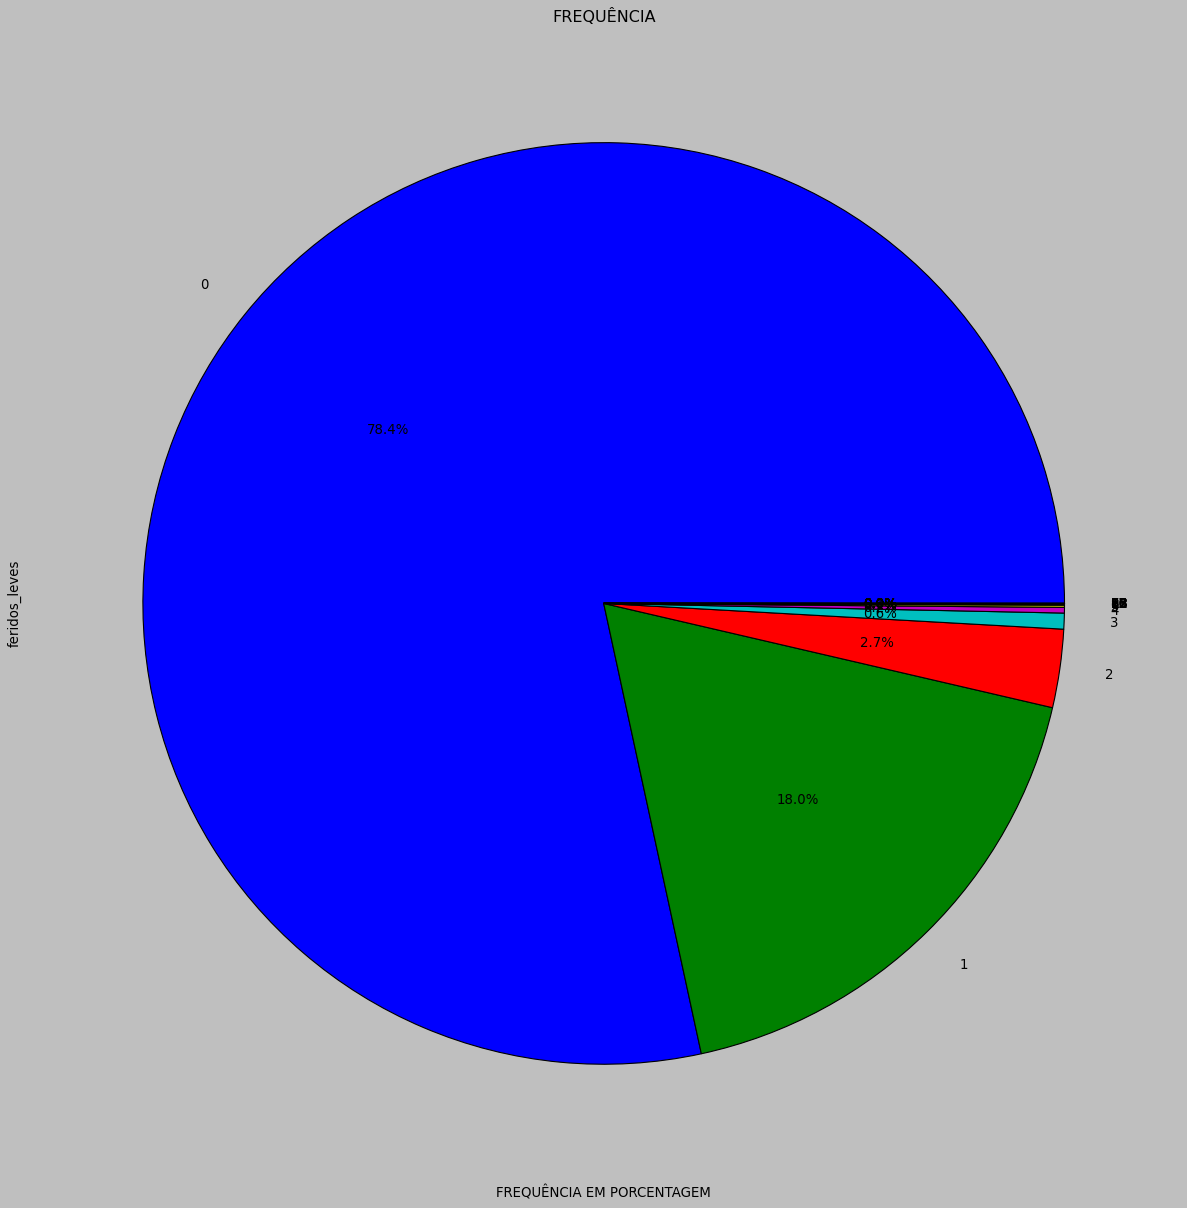

In [25]:
plt.figure( figsize=(20, 18))
(juntando_dados['feridos_graves'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('feridos_leves')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

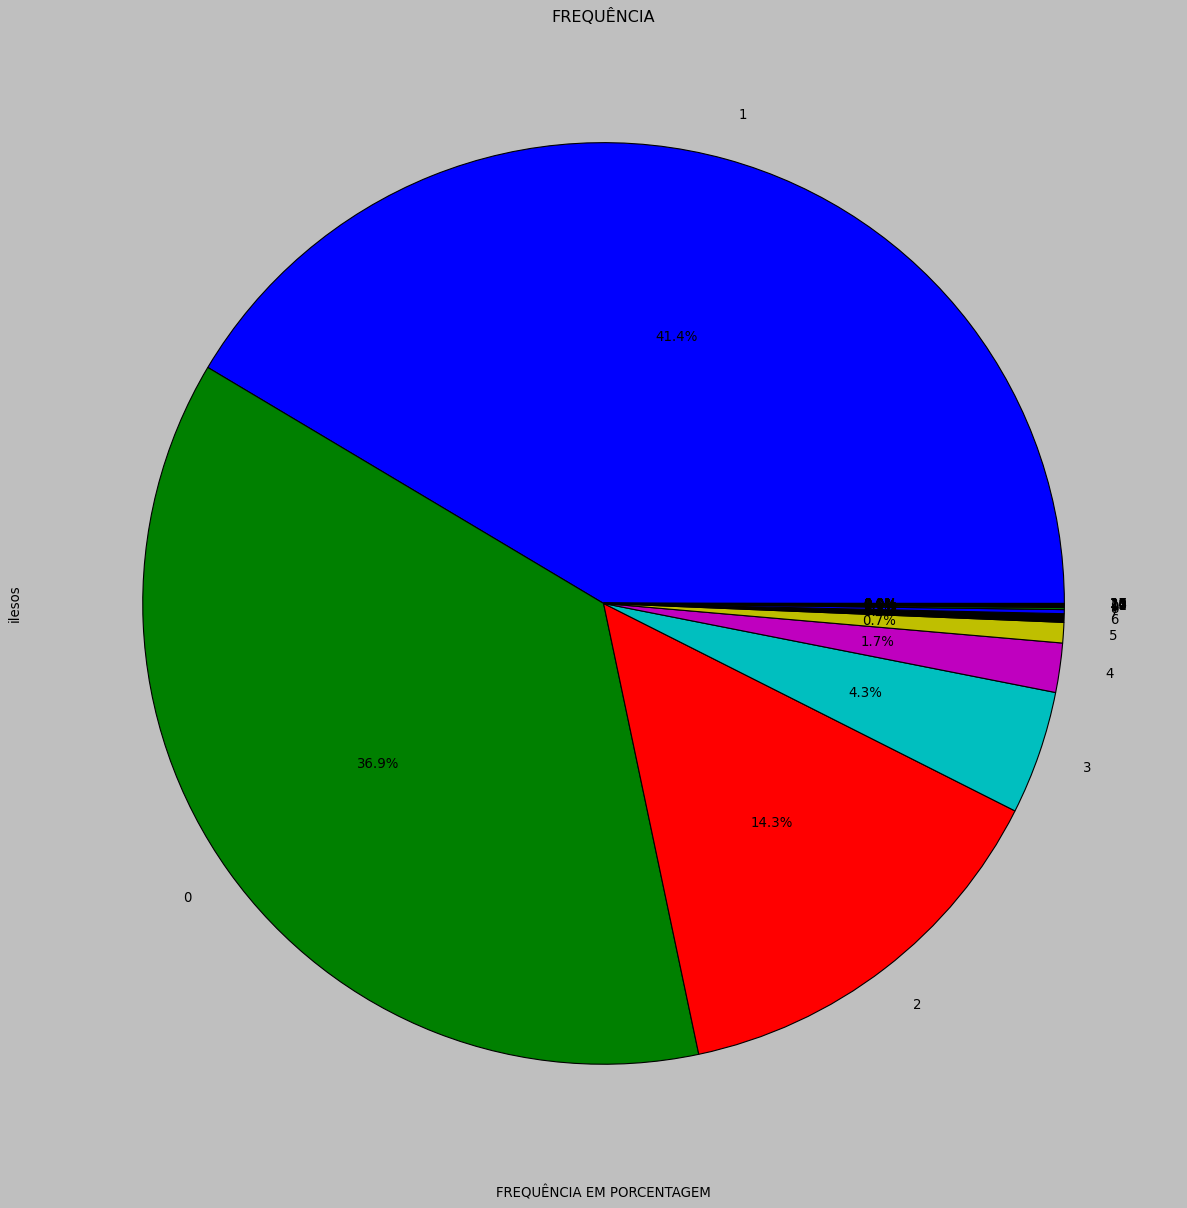

In [26]:
plt.figure( figsize=(20, 18))
(juntando_dados['ilesos'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('ilesos')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

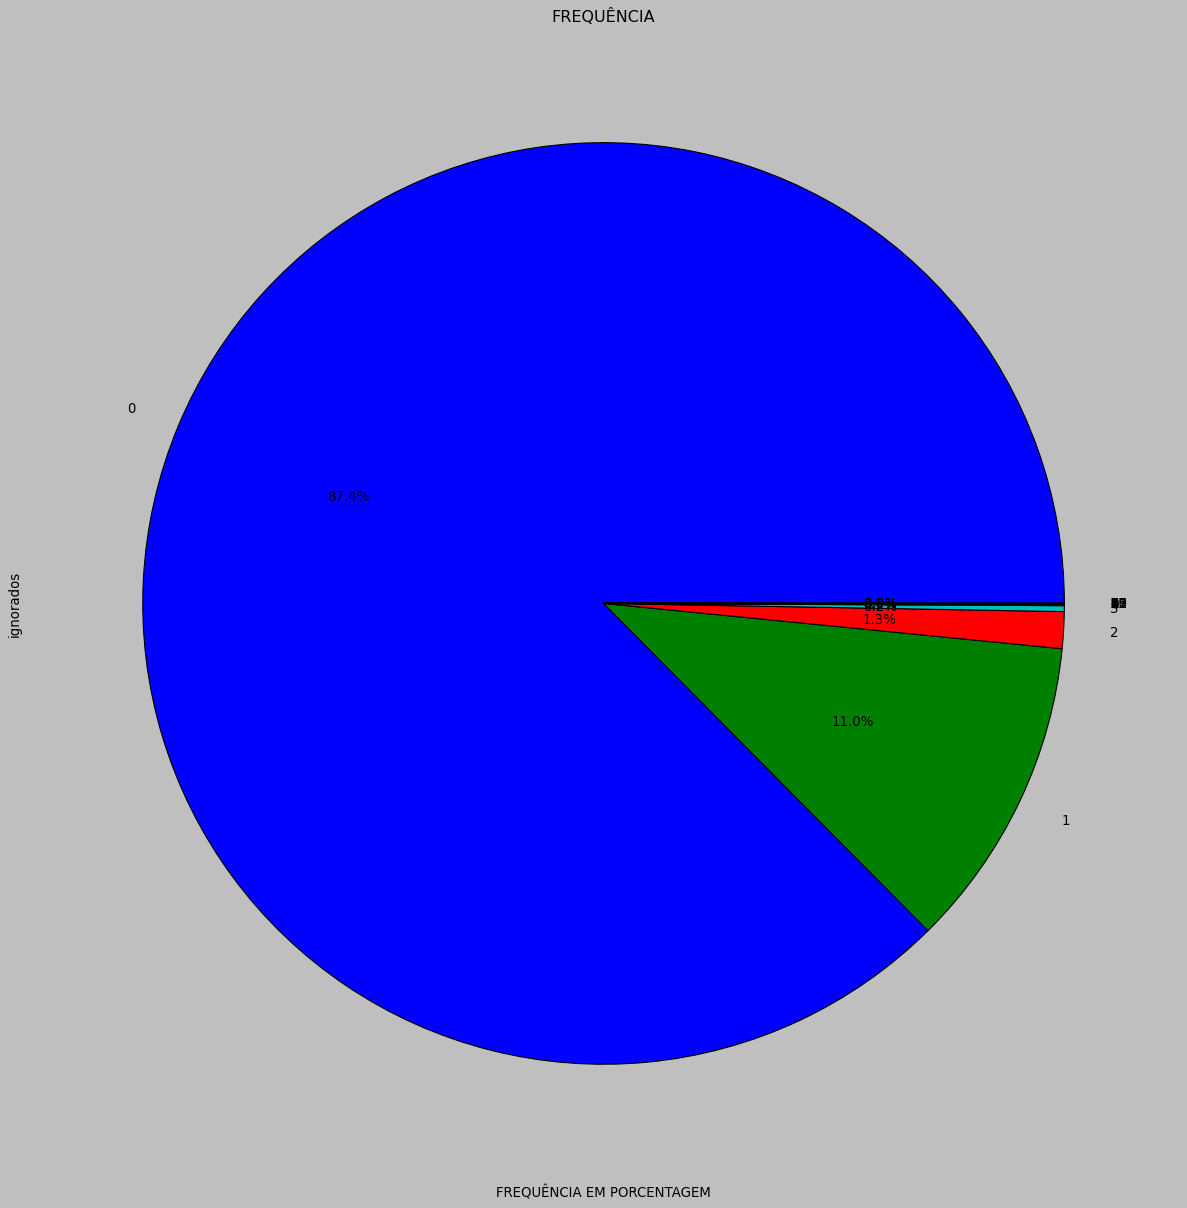

In [27]:
plt.figure( figsize=(20, 18))
(juntando_dados['ignorados'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('ignorados')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

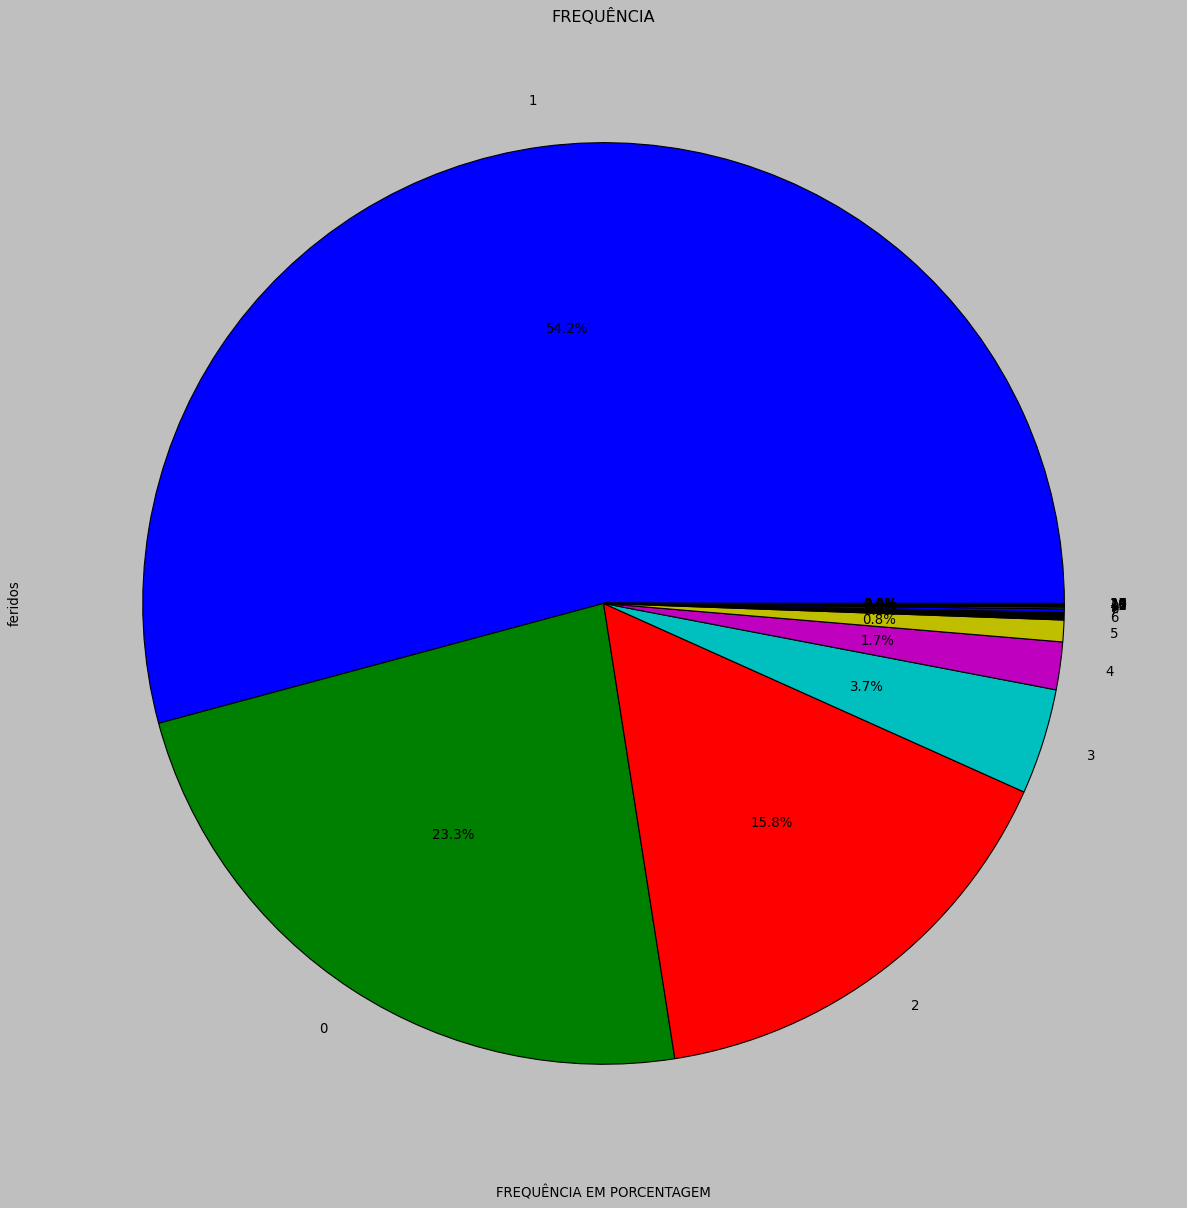

In [28]:
plt.figure( figsize=(20, 18))
(juntando_dados['feridos'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('feridos')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

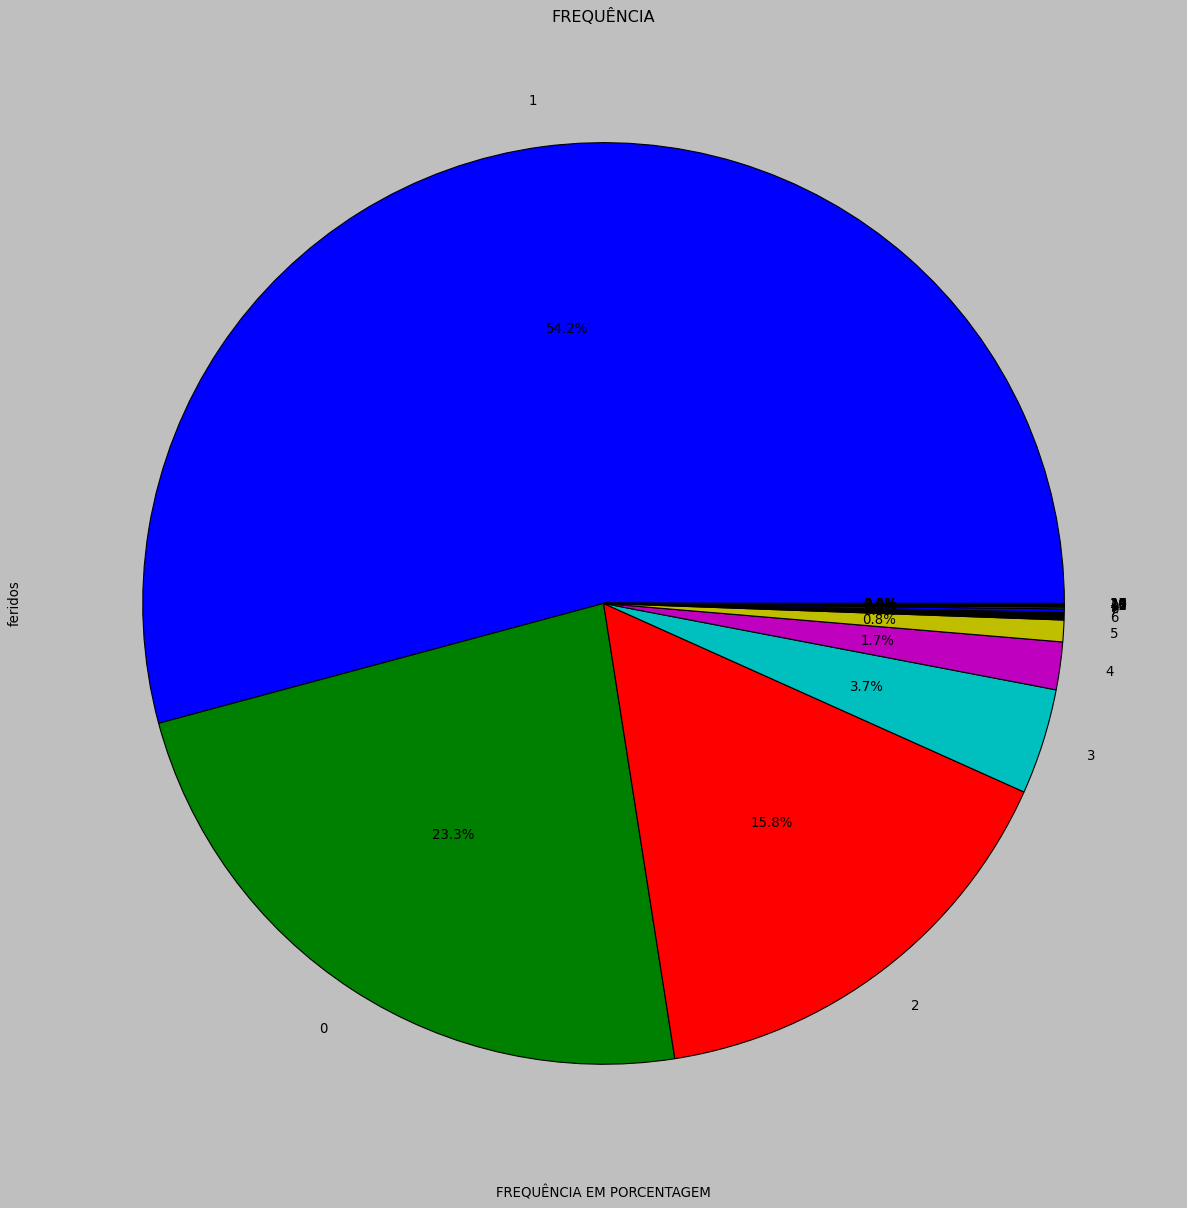

In [29]:
plt.figure( figsize=(20, 18))
(juntando_dados['feridos'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('feridos')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

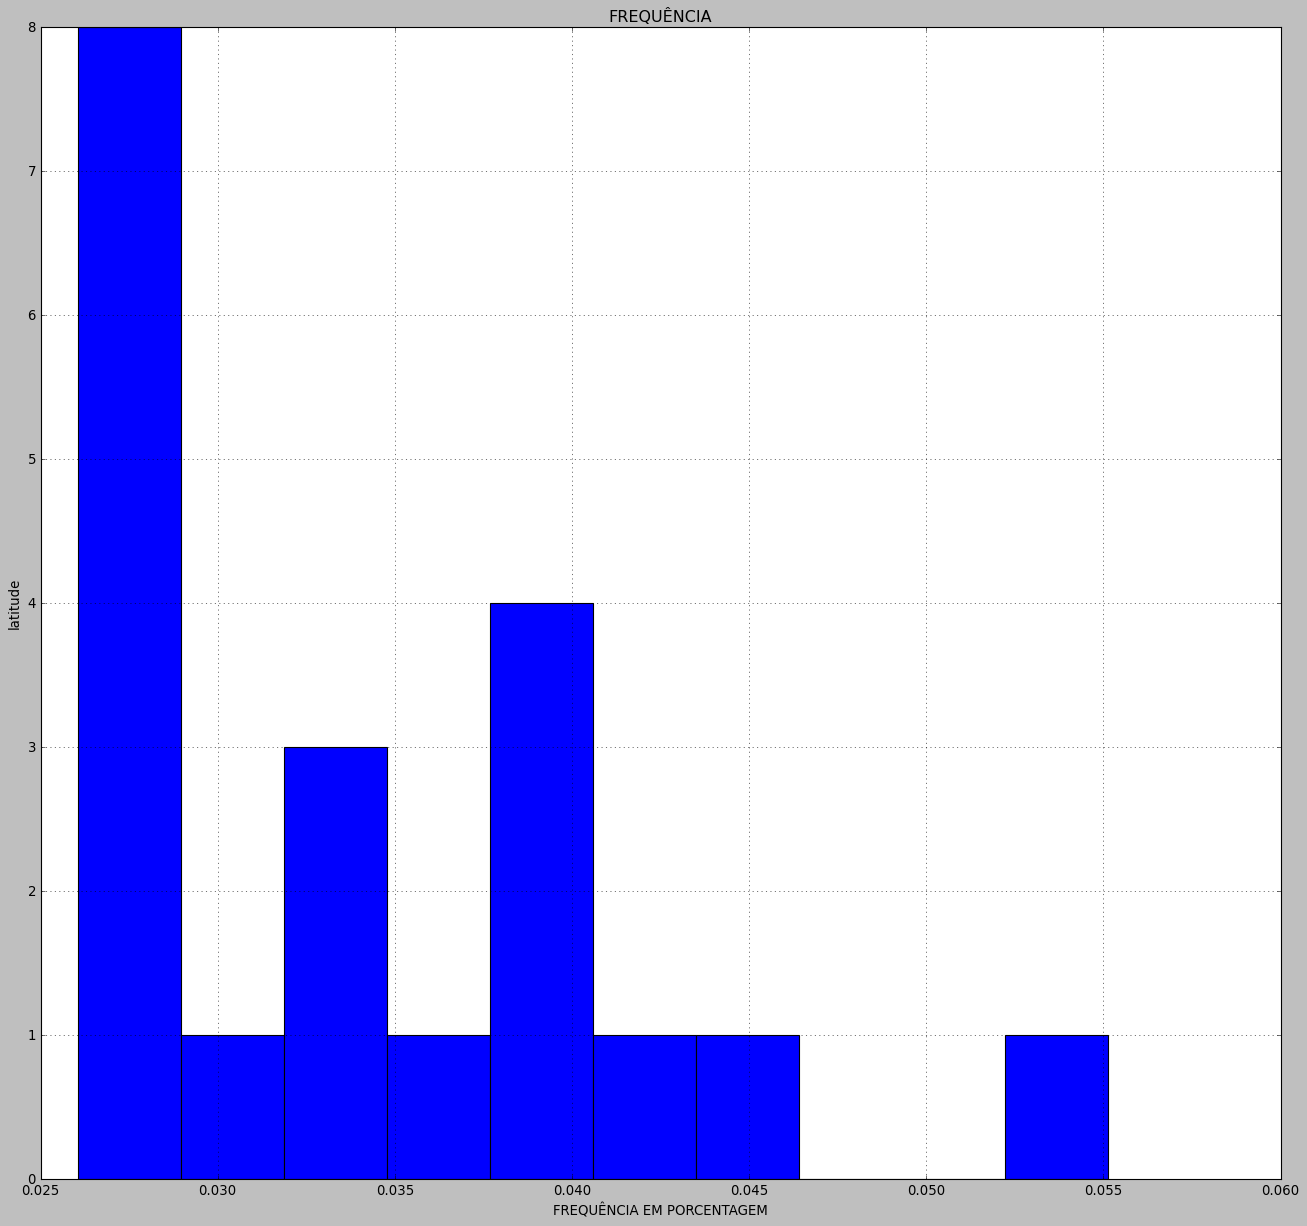

In [30]:
plt.figure( figsize=(20, 18))
(juntando_dados['latitude'].value_counts(normalize=True)*100).head(20).hist()
plt.title('FREQUÊNCIA')
plt.ylabel('latitude')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

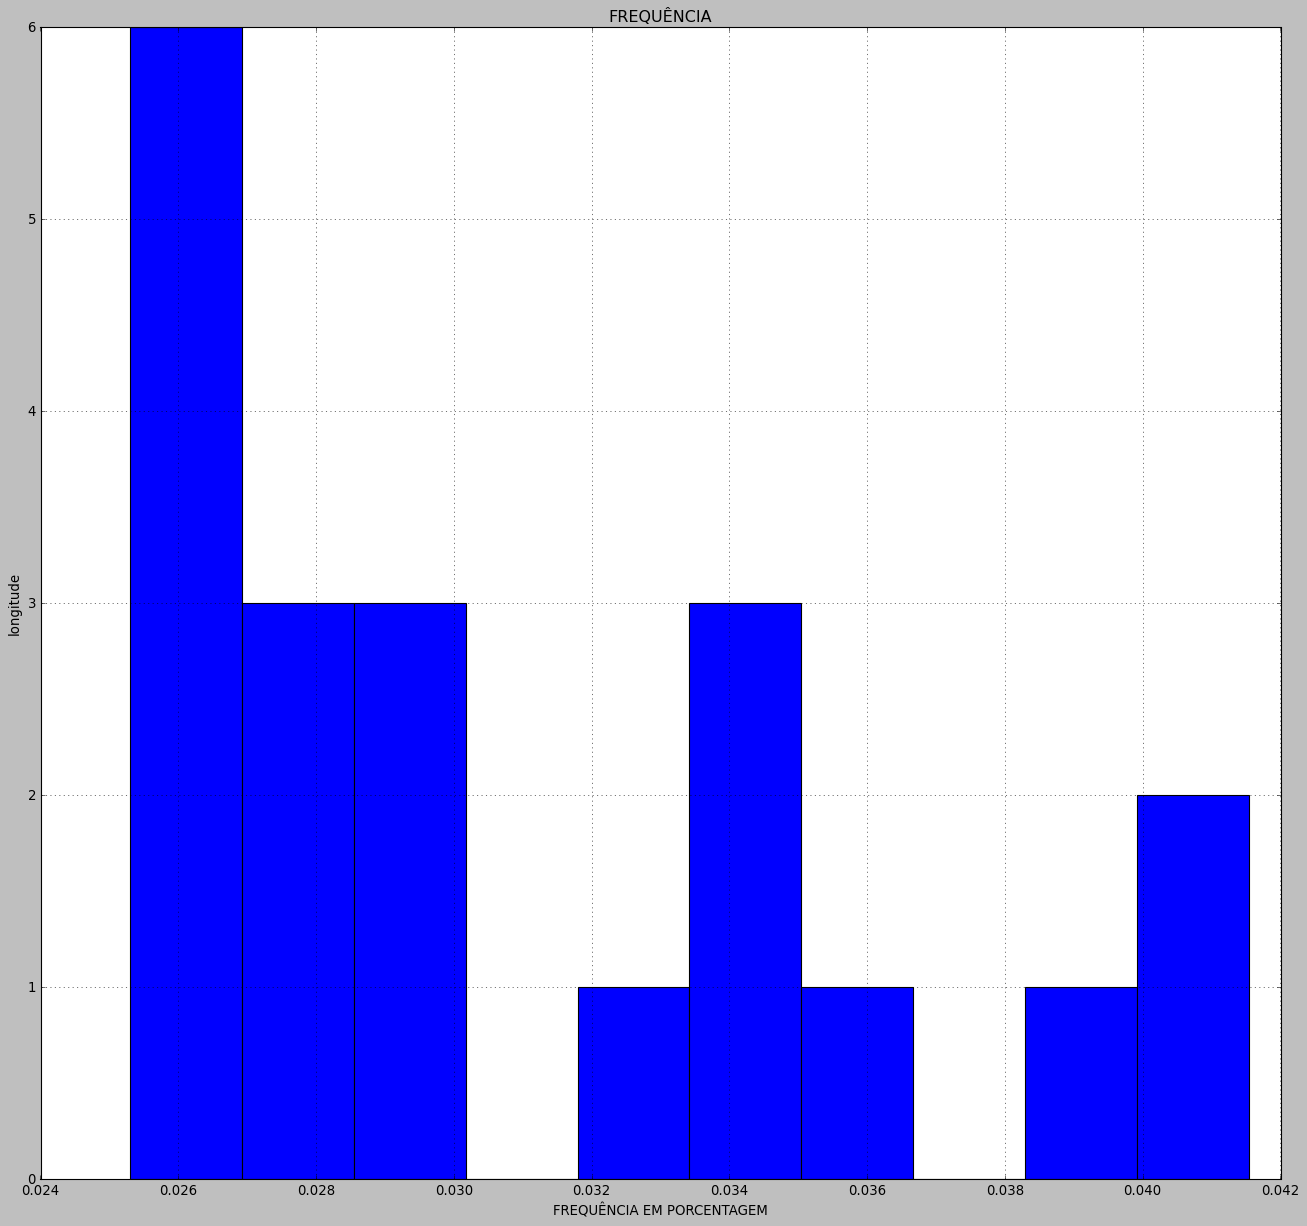

In [31]:
plt.figure( figsize=(20, 18))
(juntando_dados['longitude'].value_counts(normalize=True)*100).head(20).hist()
plt.title('FREQUÊNCIA')
plt.ylabel('longitude')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

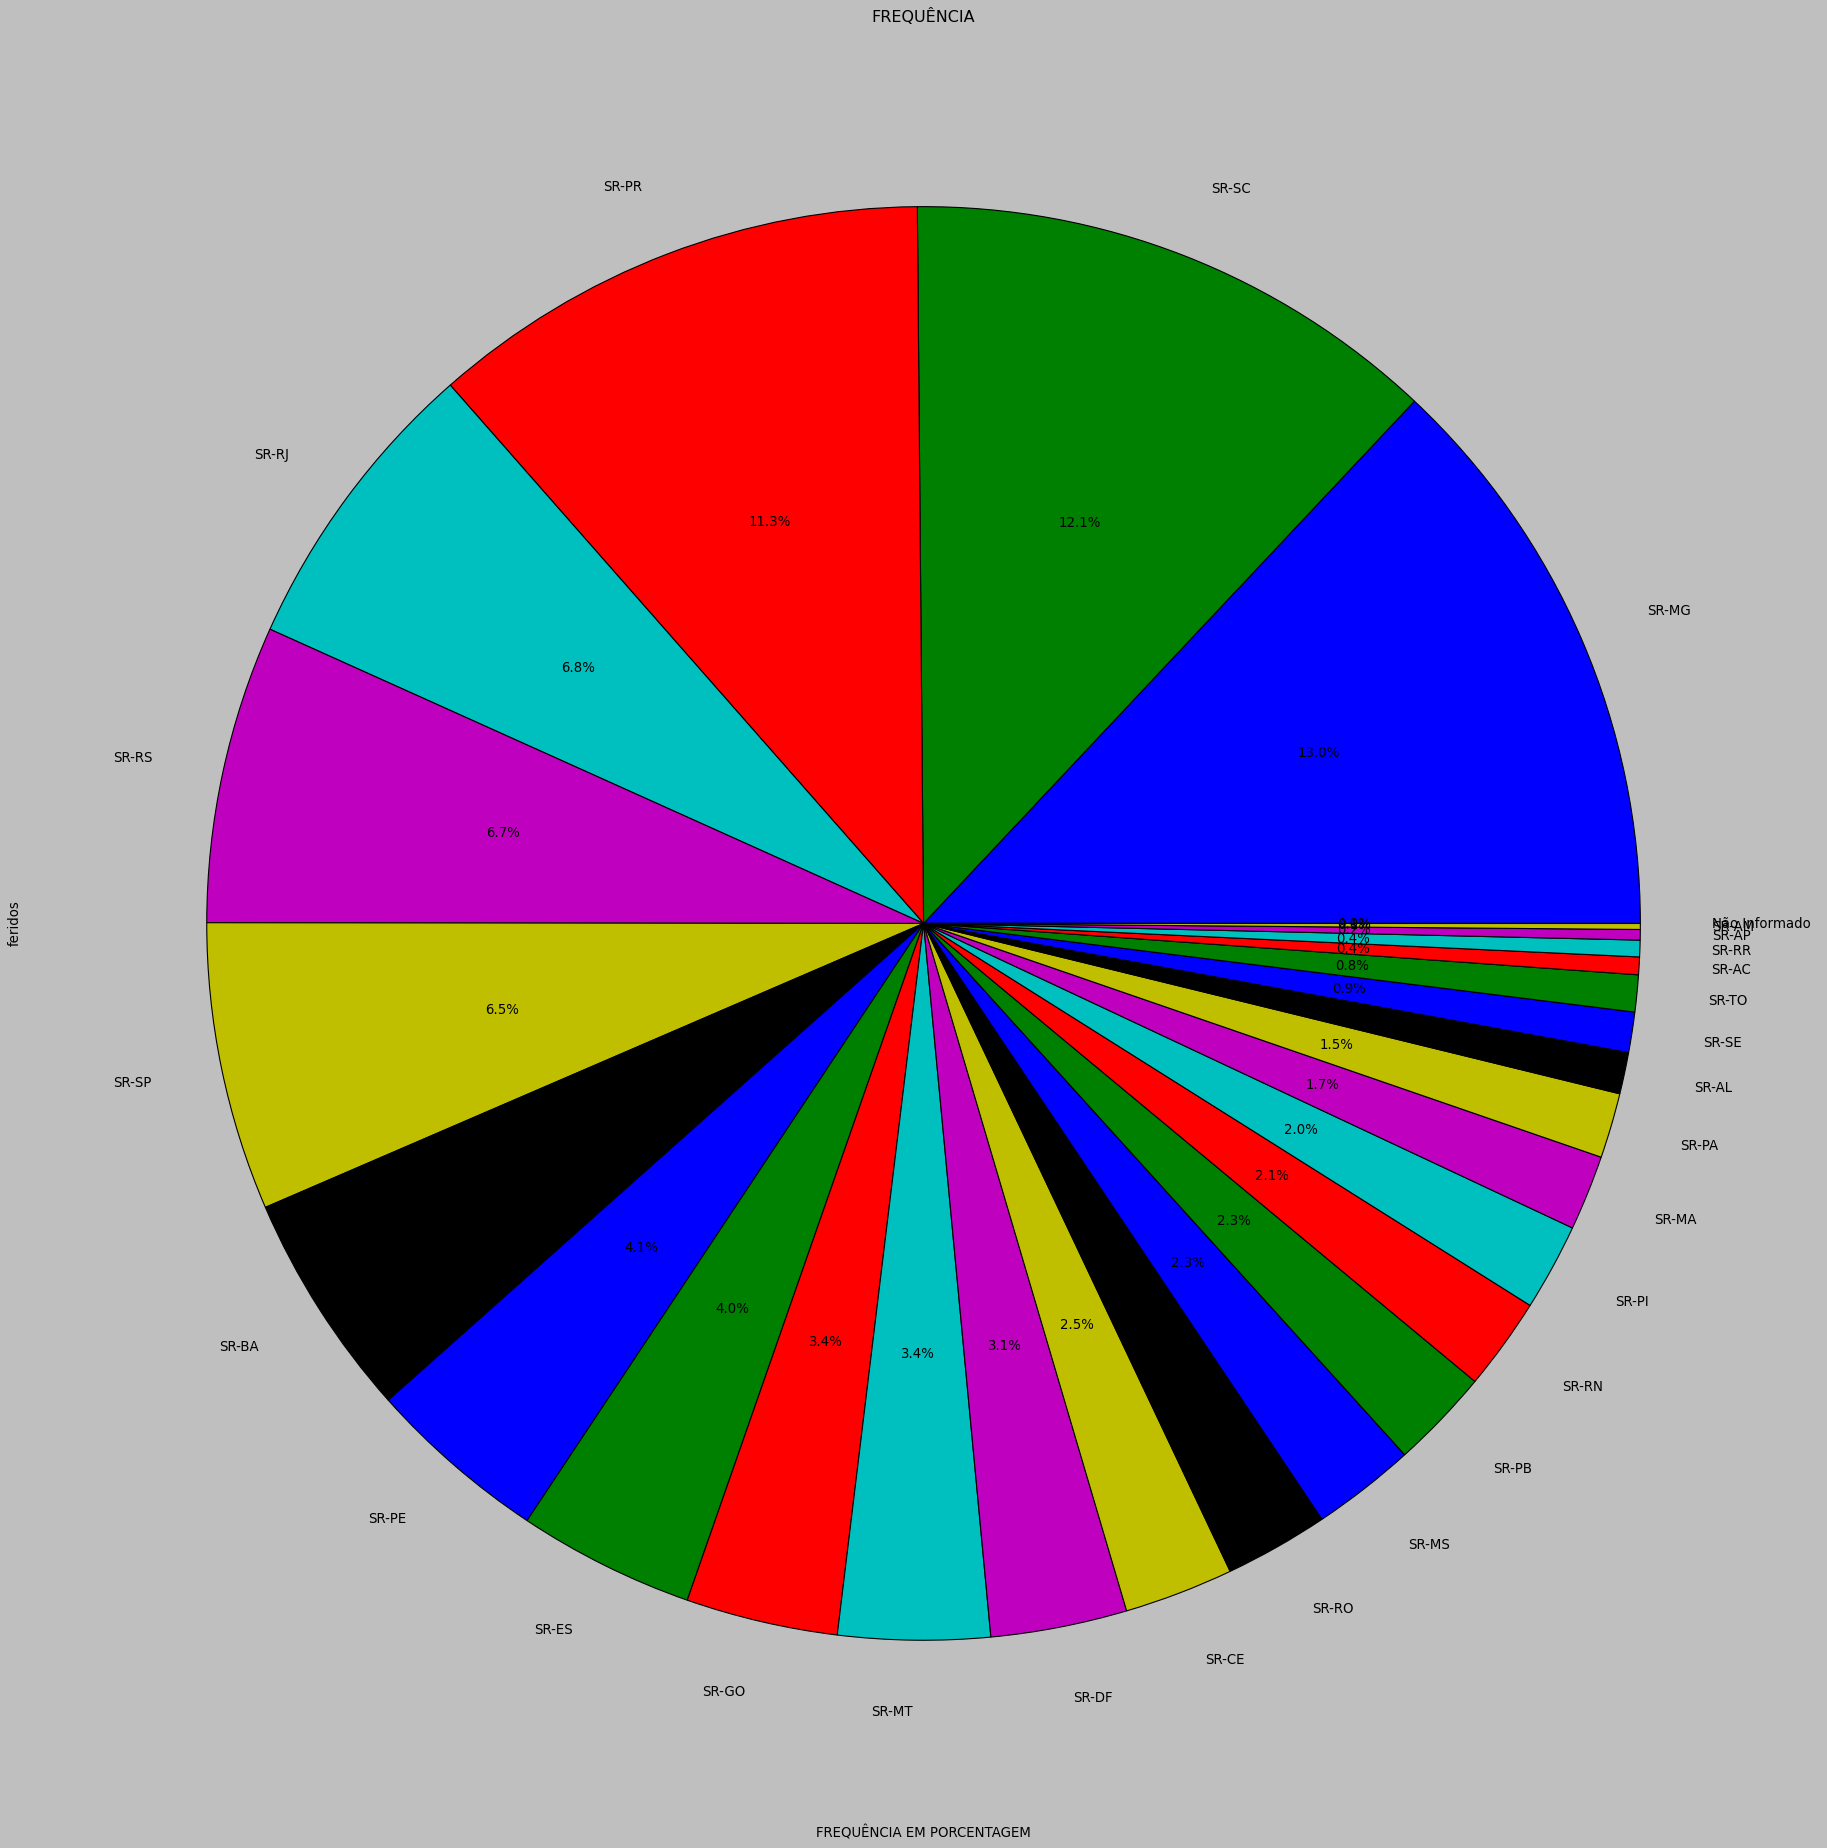

In [32]:
plt.figure( figsize=(30, 28))
(juntando_dados['regional'].value_counts(normalize=True)*100).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('feridos')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

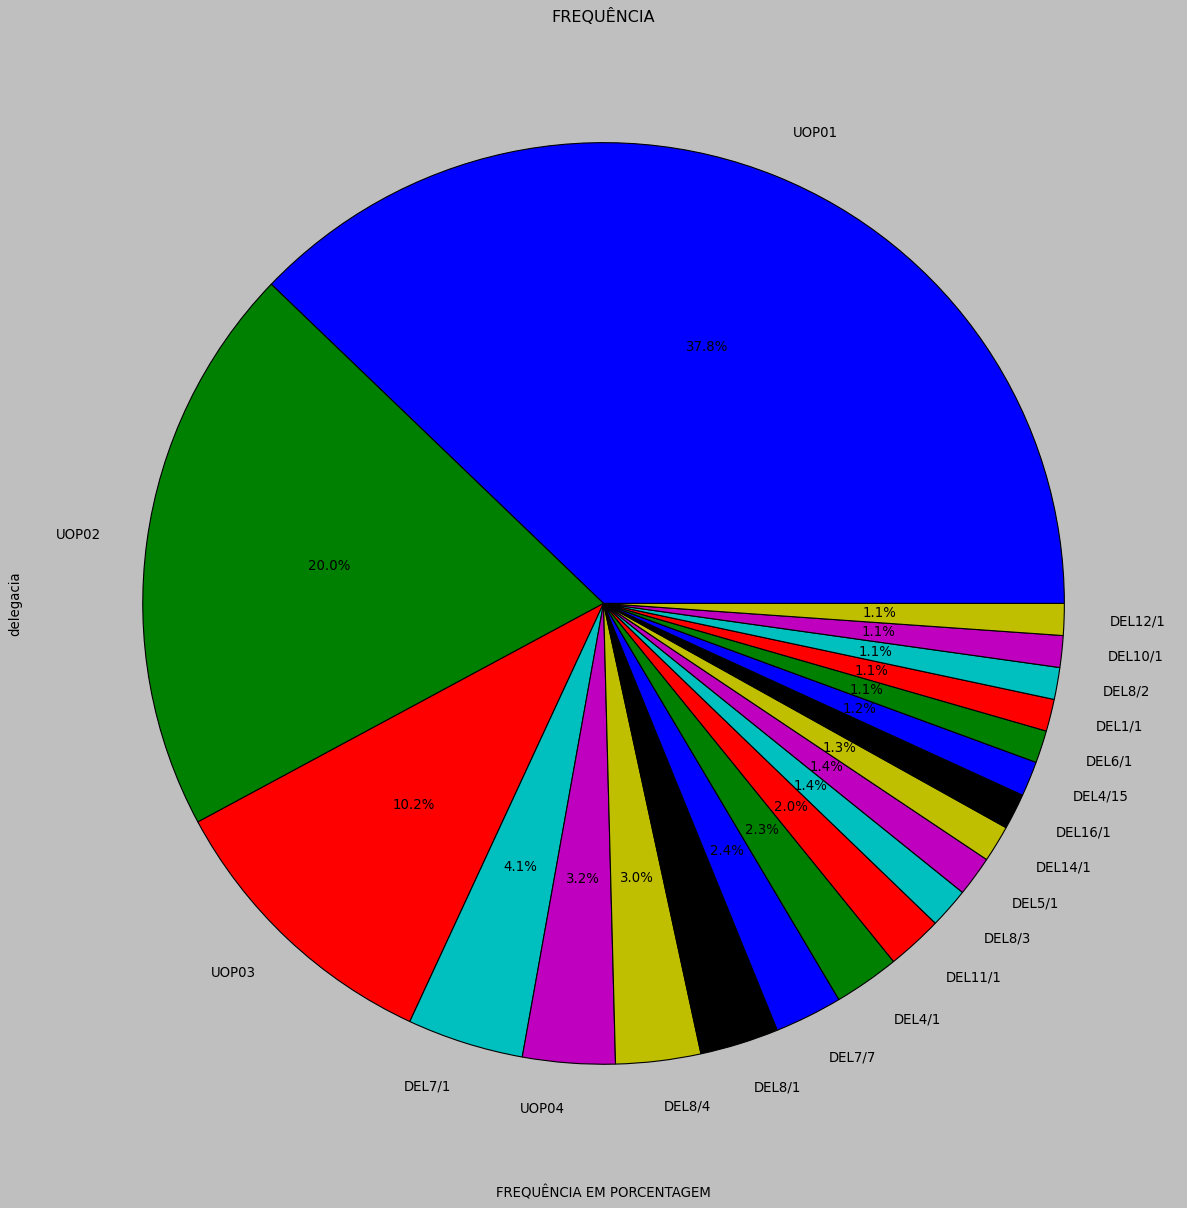

In [33]:
plt.figure( figsize=(20, 18))
(juntando_dados['delegacia'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('delegacia')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

Text(0.5, 0, 'FREQUÊNCIA EM PORCENTAGEM')

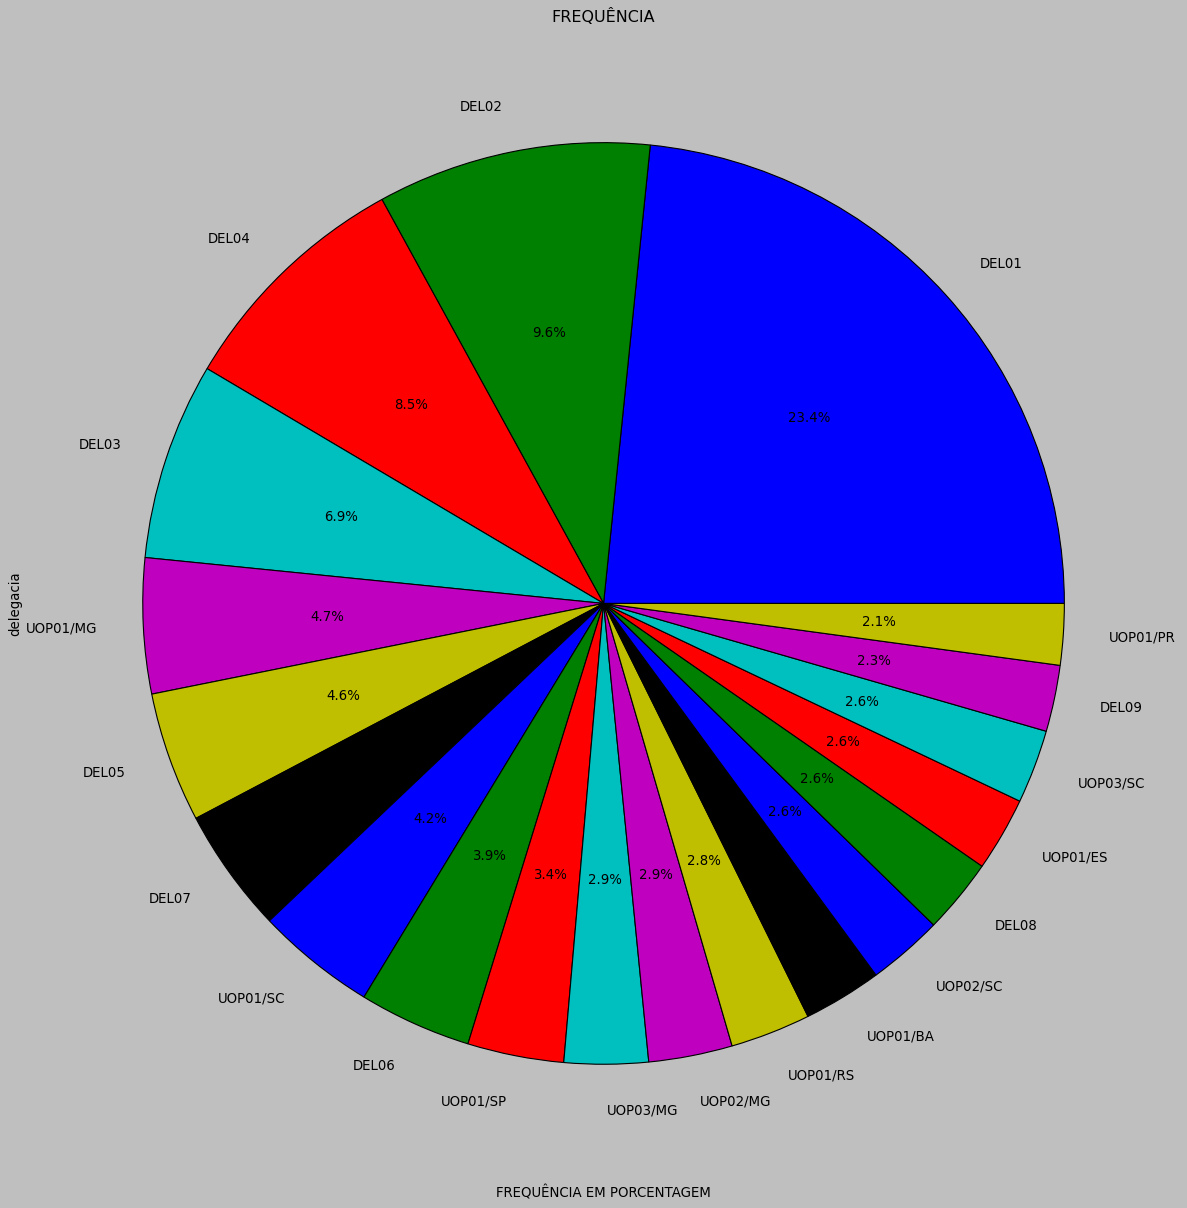

In [34]:
plt.figure( figsize=(20, 18))
(juntando_dados['uop'].value_counts(normalize=True)*100).head(20).plot(kind='pie', autopct='%1.1f%%')
plt.title('FREQUÊNCIA')
plt.ylabel('delegacia')
plt.xlabel('FREQUÊNCIA EM PORCENTAGEM')

<div class="alert alert-block alert-info">
    3° Tarefa<br>Com base nas distribuições construídas na questão anterior, responda:
<div>

<div class="alert alert-block alert-info" style="background-color:#b9ceac; color:#000; border-radius:15px;" >
    a) qual a causa mais frequente e a mais rara de acidentes registrados nos quatro anos?
<div>

Analisando o graficos feitos dar para dizer que a causa mais frequente de acidentes foi **Falta de atenção**
a mais ra foir **sistema de drenagem ineficiente** 

<div class="alert alert-block alert-info" style="background-color:#b9ceac; color:#000; border-radius:15px;" >
    b) qual a proporção de pessoas ilesas e a de feridos graves por ano em cada um dos anos
considerados no estado da Paraíba
<div>

In [42]:
# separando o ano do mes e do dia

mes18 = dados_prf_2018[['ano', 'mes', 'dia']] = dados_prf_2018['data_inversa'].str.split('-', expand=True)
mes18.iloc[:,1:2].rename(columns = {1:'ano'})

# pegando colunas que interressão para a analise

mes_2018b = dados_prf_2018.loc[:,['ano','pessoas','ilesos','feridos_graves']]
ano2018 = mes_2018b.groupby(by='ano').sum()
probalidade_ilesos_18 = (ano2018['ilesos']/ano2018['pessoas'])
probalidade_feridos_18 = (ano2018['feridos_graves']/ano2018['pessoas'])
probalidade_2018 = pd.DataFrame(probalidade_ilesos_18).rename(columns={0:'proporção ilesos em 2018'}).round(4)
probalidade_2018['proporção feridos graves em 2018'] = pd.DataFrame(probalidade_feridos_18).round(4)
probalidade_2018


,proporção ilesos em 2018,proporção feridos graves em 2018
ano,,
2018,0.4483,0.1074


In [41]:
# separando o ano do mes e do dia

mes19 = dados_prf_2019[['ano', 'mes', 'dia']] = dados_prf_2019['data_inversa'].str.split('-', expand=True)
mes19.iloc[:,1:2].rename(columns = {1:'ano'})

# pegando colunas que interressão para a analise

mes_2019b = dados_prf_2019.loc[:,['ano','pessoas','ilesos','feridos_graves']]
ano2019 = mes_2019b.groupby(by='ano').sum()

probalidade_ilesos_19 = (ano2019['ilesos']/ano2019['pessoas'])
probalidade_feridos_19 = (ano2019['feridos_graves']/ano2019['pessoas'])
probalidade_2019 = pd.DataFrame(probalidade_ilesos_19).rename(columns={0:'proporção ilesos em 2019'}).round(4)
probalidade_2019['proporção feridos graves em 2019'] = pd.DataFrame(probalidade_feridos_19).round(4)
probalidade_2019


,proporção ilesos em 2019,proporção feridos graves em 2019
ano,,
2019,0.423,0.1145


In [40]:
# separando o ano do mes e do dia

mes20 = dados_prf_2020[['ano', 'mes', 'dia']] = dados_prf_2020['data_inversa'].str.split('-', expand=True)
mes20.iloc[:,1:2].rename(columns = {1:'ano'})

# pegando colunas que interressão para a analise

mes_2020b = dados_prf_2020.loc[:,['ano','pessoas','ilesos','feridos_graves']]
ano2020 = mes_2020b.groupby(by='ano').sum()
probalidade_ilesos_20 = (ano2020['ilesos']/ano2020['pessoas'])
probalidade_feridos_20 = (ano2020['feridos_graves']/ano2020['pessoas'])
probalidade_2020 = pd.DataFrame(probalidade_ilesos_20).rename(columns={0:'proporção ilesos em 2020'}).round(4)
probalidade_2020['proporção feridos graves em 2020'] = pd.DataFrame(probalidade_feridos_20).round(4)
probalidade_2020

,proporção ilesos em 2020,proporção feridos graves em 2020
ano,,
2020,0.4121,0.1158


In [45]:
# separando o ano do mes e do dia

mes21 = dados_prf_2021[['ano', 'mes', 'dia']] = dados_prf_2021['data_inversa'].str.split('-', expand=True)
mes21.iloc[:,1:2].rename(columns = {1:'ano'})

# pegando colunas que interressão para a analise
mes_2021b = dados_prf_2021.loc[:,['ano','pessoas','ilesos','feridos_graves']]
ano2021 = mes_2021b.groupby(by='ano').sum()

probalidade_ilesos_21 = (ano2021['ilesos']/ano2021['pessoas'])
probalidade_feridos_21 = (ano2021['feridos_graves']/ano2021['pessoas'])

probalidade_2021 = pd.DataFrame(probalidade_ilesos_21).rename(columns={0:'proporção ilesos em 2021'}).round(4)
probalidade_2021['proporção feridos graves em 2021'] = pd.DataFrame(probalidade_feridos_21).round(4)
probalidade_2021

,proporção ilesos em 2021,proporção feridos graves em 2021
ano,,
2021,0.4199,0.117


<div class="alert alert-block alert-info" style="background-color:#b9ceac; color:#000; border-radius:15px;" >
    c)  pandemia conseguiu diminuir ou não a incidência de acidentes nas rodovias federais?
existe diferença a esse respeito considerando o Brasil e somente o estado da Paraíba?
<div>

Na paraiba não conseguiu não diminuir a inicidencia de acidentes<br>
Analisando friamente os dados da porcentagem ver que nos de 2018 para 2019 já foi se vendo uma diminução nos numeros de acidentes que com a chegada pandema ouve uma diminuição significativa e em 2021 ouve um aumento de 9.67 em relação 2020


<div class="alert alert-block alert-info">
    4° Tarefa<br>Construa duas perguntas não levantadas aqui sobre os dados disponibilizados e as responda
usando gráficos para sua embasar sua explicação.
<div>